### Report Analysis

In [1]:
# pip install wordcloud

In [2]:
import unicodedata
import os
import sys
import re
import numpy as np
import pandas as pd
from pathlib import Path
import nltk
from nltk import word_tokenize 
import shutil
from os.path import isfile, join
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from wordcloud import WordCloud
from nltk.corpus import stopwords
# nltk.download('tagsets')
# nltk.download('wordnet')
# nltk.download('punkt')
# nltk.help.upenn_tagset('NNP')
# nltk.help.upenn_tagset('NN')
# nltk.download('maxent_ne_chunker')
# nltk.download('words')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('stopwords')   

##### Functions

In [3]:
# custom character alphabet for word
tr = re.compile(r"[abcçdefgğhıijklmnoöprsştuüvyzqxw]+", re.IGNORECASE|re.UNICODE) # Turkish filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n0123456789'
en = re.compile(r"[abcdefghıijklmnopqrstxuvwyz]+", re.IGNORECASE|re.UNICODE) # English
nl = re.compile(r"[abcdefghıijklmnopqrstxuvwyzāăēĕīĭōŏūŭ]+", re.IGNORECASE|re.UNICODE) # Dutch (Flemenk)
fr = re.compile(r"[abcçdefghıijklmnopqrstxuvwyzàâæèéêëîïôœùûüÿ]+", re.IGNORECASE|re.UNICODE) # French
de = re.compile(r"[abcdefghıijklmnopqrstxuvwyzäöüß]+", re.IGNORECASE|re.UNICODE) # German
es = re.compile(r"[abcdefghıijklmnopqrstxuvwyzñáéíóú]+", re.IGNORECASE|re.UNICODE) # Spanish (¿¡)
pt = re.compile(r"[abcçdefghıijklmnopqrstxuvwyzàáâãéêíóôõú]+", re.IGNORECASE|re.UNICODE) # Portuguese
it = re.compile(r"[abcdefghıijklmnopqrstxuvwyzàéèìòùî]+", re.IGNORECASE|re.UNICODE) # Italian
ar = re.compile(r"[ٿصؼۤڳڲؿڎػڠجڿ٬ٸؽؒؓطۄڀۂؘؔتٚڛےٝڜؖڦ٫ډ۰زۇٖۀ،لۓعٮێڔ۶ؚۧۜڤۏإٞٷؗۖ؈ژۣؕؑٴأۻڸۺگاڴڹۯ؉ْڌ؍ي؟ـٟړۅؐڶُىڽېًۢؠضۚڄٛڏٱۦ٩س٦ڼڂٔۘ٠ښٌٍ۬ٳ۾ٲږذۋٵٜ٘ڞڅںٗهڣۿپڒۥۗڋیؙم؞ثۨٹڵڪظٶۭ١ڭەڨحٕ؎ٺڷٰ۪۫ڻڥۛڑڟټآڡغګ؊ّٯڧڮ؏ۮ؋ؤ٪ؾڗۼق۟دکوِڰڐۃ۽ہفرڇچڝ۴بۈٽڕۡھةٓڃئ؛ڬٙڙڢڱۊَۆۉځ۠ۍۑۙڊنءڈٻشڍ؇۵كخ\ا]+", re.IGNORECASE|re.UNICODE) # Arabic

In [4]:
def convert_one_character_letter(text):
    '''This function converts two byte occupy of letter to one byte unicode character without any visual change \n
    like as Turkish character ç,ş,ö,ğ. \n
    convert_one_character_letter(text): text is any string word or sentence.
    '''
    new_text = unicodedata.normalize('NFC', f"{text}")
    return new_text

In [5]:
def clean_text(text, custom_alp=tr): # for only string in specific language
    '''This function extract custom_alp character from string \n
    clean_text(text, custom_alp): text is any string word or sentence and custom_alp is specific alphabet.
    '''
    #text_clean = re.findall(custom_alp, text)
    text_result_list = []
    text_list = re.findall(r'\S+', text)
    for text_var in text_list:
        text_clean = re.findall(custom_alp, str(text_var))
        text_result_var = "".join(text_clean)
        text_result_list.append(text_result_var)
    text_result = " ".join(text_result_list)
    return text_result

In [6]:
def lower_func(text):
    '''This function convert string character to lowercase. \n
    lower_func(text=str): text is any string word or sentence
    '''
    string_lower = str.lower(text)
    return string_lower

In [7]:
def character_clean_lower_text(text, custom_alp=tr): # for only string in specific language
    '''This function converts two byte occupy of letter to one byte unicode character without any visual change \n
    like as Turkish character ç,ş,ö,ğ. And also extract custom_alp character from string and convert to lowercase. \n
    character_clean_lower_text(text, custom_alp): text is any string word or sentence and custom_alp is specific alphabet.  
    '''
    new_text = unicodedata.normalize('NFC', f"{text}")
    text_result_list = []
    text_list = re.findall(r'\S+', new_text)  # like as word tokenize
    for text_var in text_list:
        text_clean = re.findall(custom_alp, str(text_var))
        text_result_var = "".join(text_clean)
        text_result_list.append(text_result_var)
    text_join = " ".join(text_result_list)
    text_result = str.lower(text_join)
    return text_result

In [8]:
def whitespace_del(text):
    '''This function provides removing left right white space.\n
    whitespace_del(text): text is a string value as word or sentence.
    '''
    text = text.strip()  # rstrip lstrip
    return text

In [ ]:
# 
# plt.figure(figsize=(12,8),dpi=200)
# sns.scatterplot(x="salary", y="sales", data=df,s=200,alpha=0.6);  

#### Dogan Bazaar

##### Year

In [9]:
df_year = pd.read_csv(r"C:\Users\user\Desktop\Data Analysis\Adoba\Sales_Report\Data\DoganBazaar\report-year-2024-07-04.csv")
df_year

,Tarih,Satılan ürün sayısı,Sipariş sayısı,Ortalama net satış tutarı,Kupon tutarı,Gönderim tutarı,Brüt satış miktarı,Net satış tutarı,İade tutarı
0,2024-1,346,148,235875.85,1453.70,1637.62,164003.19,162365.57,153.29
1,2024-2,631,201,0.00,2806.89,4579.18,190030.34,185451.16,1459.97
2,2024-3,870,336,0.00,5709.85,6398.98,344925.22,338526.24,1854.97
3,2024-4,639,344,0.00,2845.30,7348.98,338393.30,331494.26,18576.53
4,2024-5,843,446,0.00,2131.64,10297.64,345020.54,334722.90,3668.35
5,2024-6,1089,225,0.00,845.50,4648.89,295007.06,290393.16,1254.96
6,2024-7,24,7,235875.85,0.00,49.99,8227.63,8177.64,4500.00


In [10]:
df_year["Satılan ürün sayısı"].sum()

4442

In [11]:
df_year["Sipariş sayısı"].sum()

1707

In [12]:
df_year.columns = [x.lower() for x in df_year.columns]
df_year

,tarih,satılan ürün sayısı,sipariş sayısı,ortalama net satış tutarı,kupon tutarı,gönderim tutarı,brüt satış miktarı,net satış tutarı,i̇ade tutarı
0,2024-1,346,148,235875.85,1453.70,1637.62,164003.19,162365.57,153.29
1,2024-2,631,201,0.00,2806.89,4579.18,190030.34,185451.16,1459.97
2,2024-3,870,336,0.00,5709.85,6398.98,344925.22,338526.24,1854.97
3,2024-4,639,344,0.00,2845.30,7348.98,338393.30,331494.26,18576.53
4,2024-5,843,446,0.00,2131.64,10297.64,345020.54,334722.90,3668.35
5,2024-6,1089,225,0.00,845.50,4648.89,295007.06,290393.16,1254.96
6,2024-7,24,7,235875.85,0.00,49.99,8227.63,8177.64,4500.00


In [13]:
df_year["sipariş ortalama ürün miktarı"] = df_year["satılan ürün sayısı"]/df_year["sipariş sayısı"]
df_year

,tarih,satılan ürün sayısı,sipariş sayısı,ortalama net satış tutarı,kupon tutarı,gönderim tutarı,brüt satış miktarı,net satış tutarı,i̇ade tutarı,sipariş ortalama ürün miktarı
0,2024-1,346,148,235875.85,1453.70,1637.62,164003.19,162365.57,153.29,2.337838
1,2024-2,631,201,0.00,2806.89,4579.18,190030.34,185451.16,1459.97,3.139303
2,2024-3,870,336,0.00,5709.85,6398.98,344925.22,338526.24,1854.97,2.589286
3,2024-4,639,344,0.00,2845.30,7348.98,338393.30,331494.26,18576.53,1.857558
4,2024-5,843,446,0.00,2131.64,10297.64,345020.54,334722.90,3668.35,1.890135
5,2024-6,1089,225,0.00,845.50,4648.89,295007.06,290393.16,1254.96,4.840000
6,2024-7,24,7,235875.85,0.00,49.99,8227.63,8177.64,4500.00,3.428571


In [14]:
year_net_sales = df_year["net satış tutarı"].sum()
year_net_sales

1651130.9299999997

In [15]:
year_retun = df_year["i̇ade tutarı"].sum()
year_retun

31468.069999999996

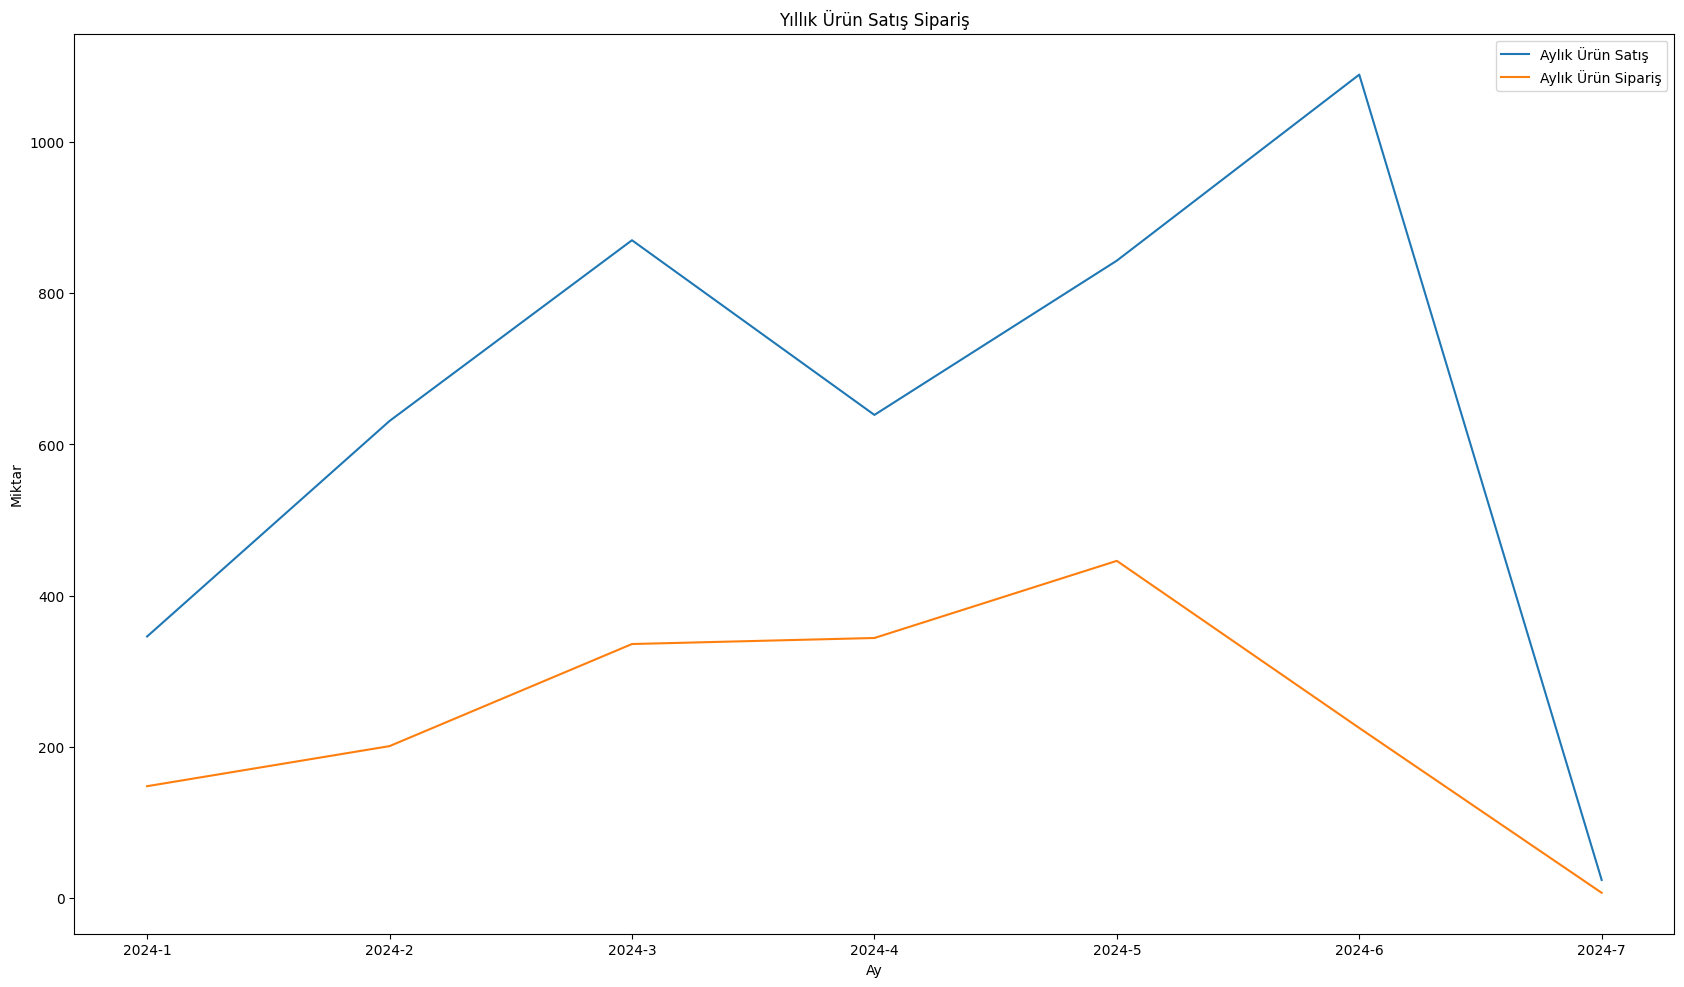

In [16]:
fig = plt.figure(figsize=(16,9), dpi=100)
ax = fig.add_axes([0,0,1,1])
ax.plot(df_year["tarih"],df_year["satılan ürün sayısı"],label='Aylık Ürün Satış')
ax.plot(df_year["tarih"],df_year["sipariş sayısı"],label="Aylık Ürün Sipariş")
ax.set_title("Yıllık Ürün Satış Sipariş")
ax.set_ylabel("Miktar")
ax.set_xlabel("Ay")
ax.legend(loc=0);

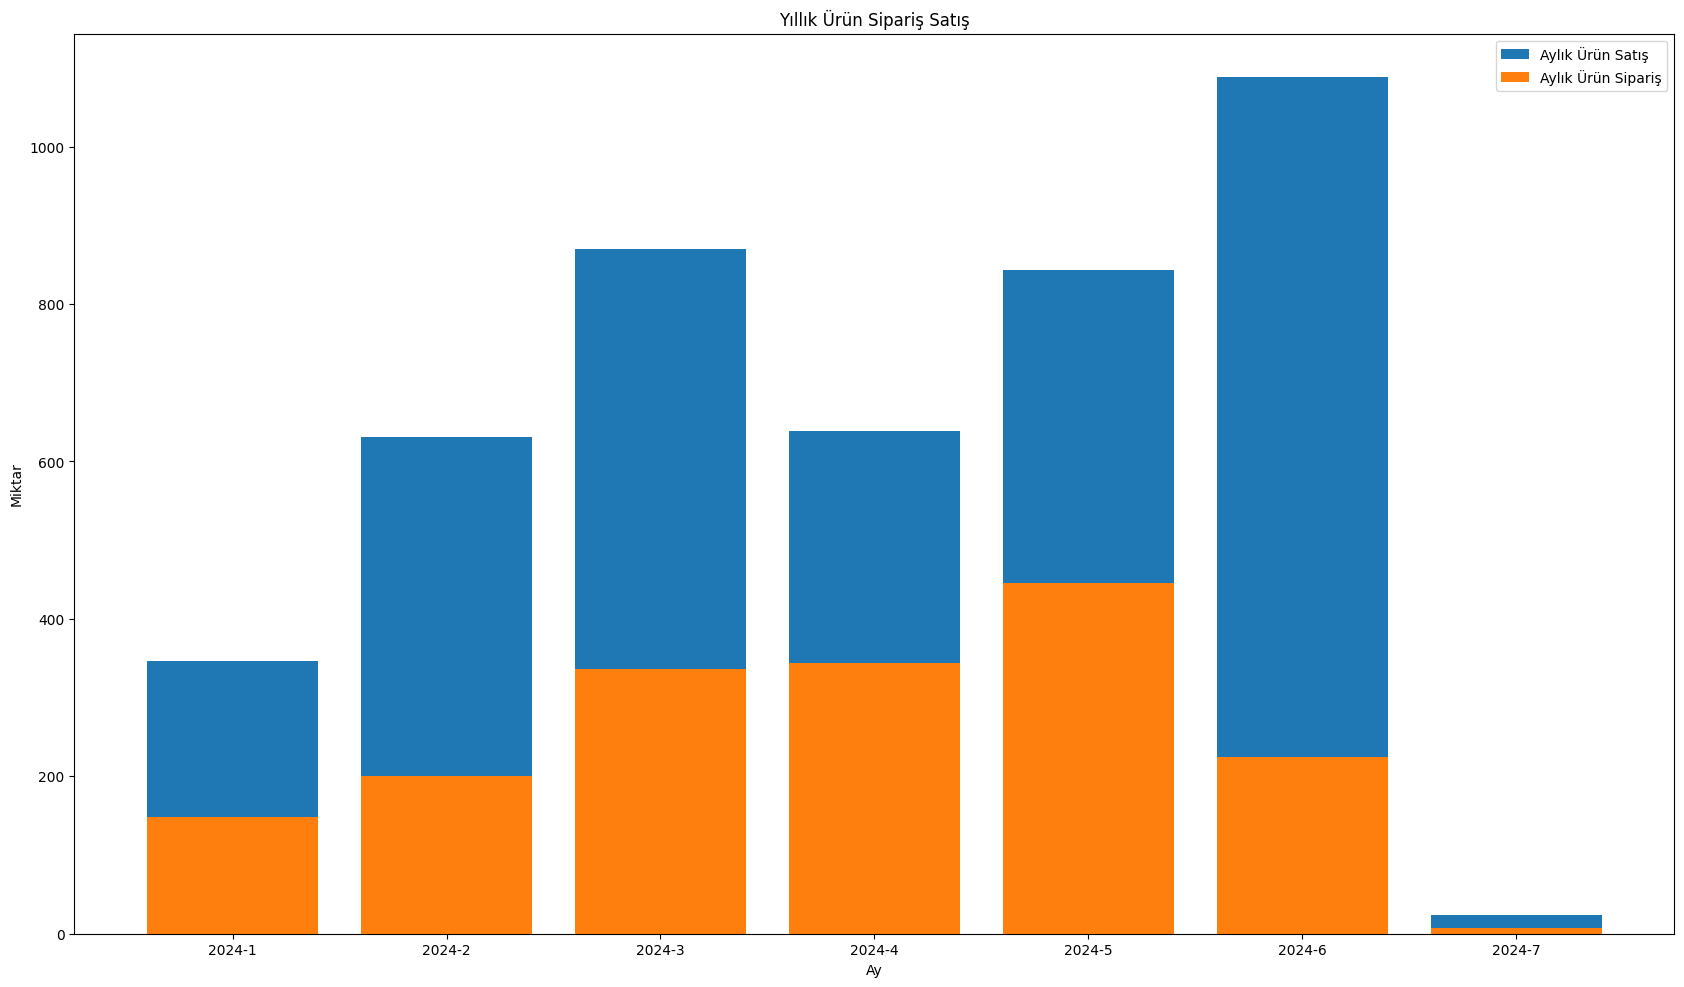

In [17]:
fig = plt.figure(figsize=(16,9), dpi=100)
ax = fig.add_axes([0,0,1,1])
ax.bar(df_year["tarih"],df_year["satılan ürün sayısı"],label='Aylık Ürün Satış')
ax.bar(df_year["tarih"],df_year["sipariş sayısı"],label="Aylık Ürün Sipariş")
ax.set_title("Yıllık Ürün Sipariş Satış")
ax.set_ylabel("Miktar")
ax.set_xlabel("Ay")
ax.legend(loc=0);

In [18]:
# dfm = df_year.melt('tarih', var_name='cols', value_name='vals')

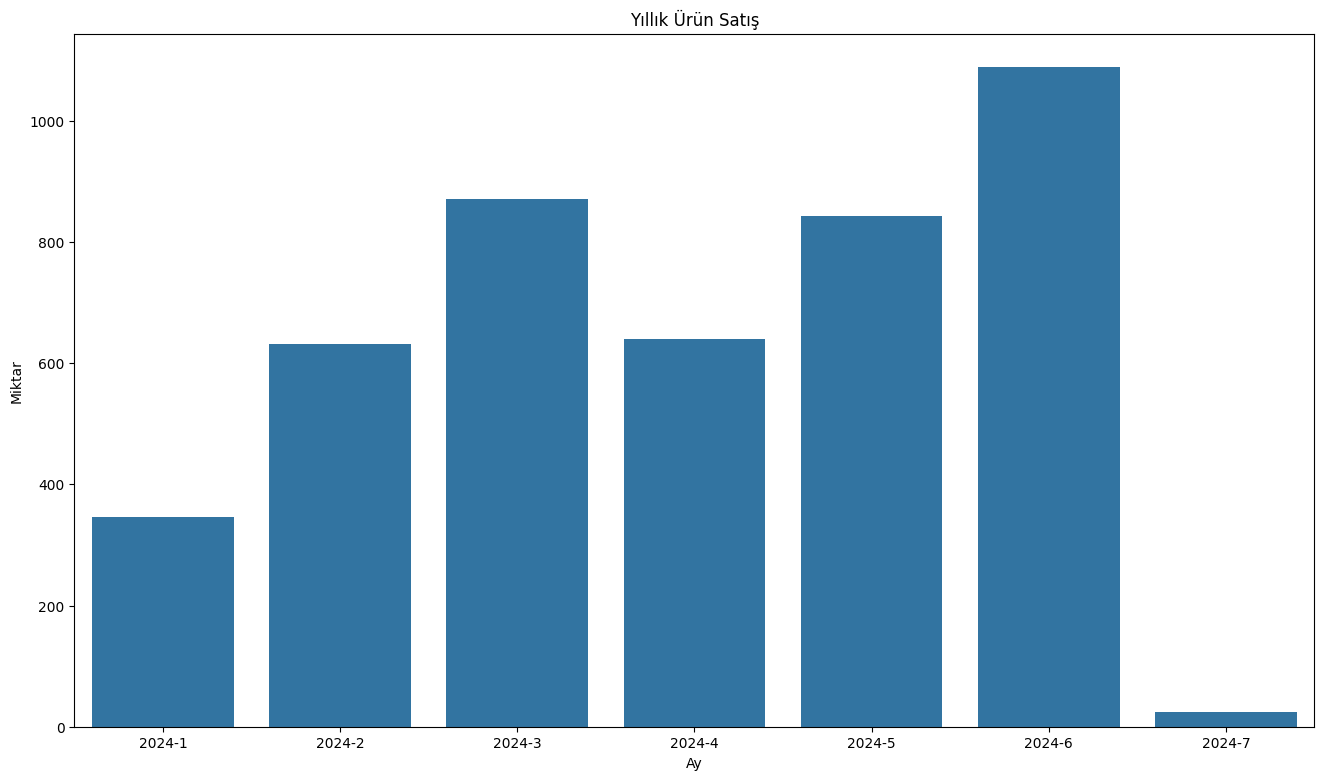

In [19]:
plt.figure(figsize=(16,9),dpi=100)
sns.barplot(data=df_year, x="tarih", y="satılan ürün sayısı")
plt.title("Yıllık Ürün Satış")
plt.ylabel("Miktar")
plt.xlabel("Ay");
#plt.legend(bbox_to_anchor=(0,0.1));

In [20]:
list(df_year["tarih"])

['2024-1', '2024-2', '2024-3', '2024-4', '2024-5', '2024-6', '2024-7']

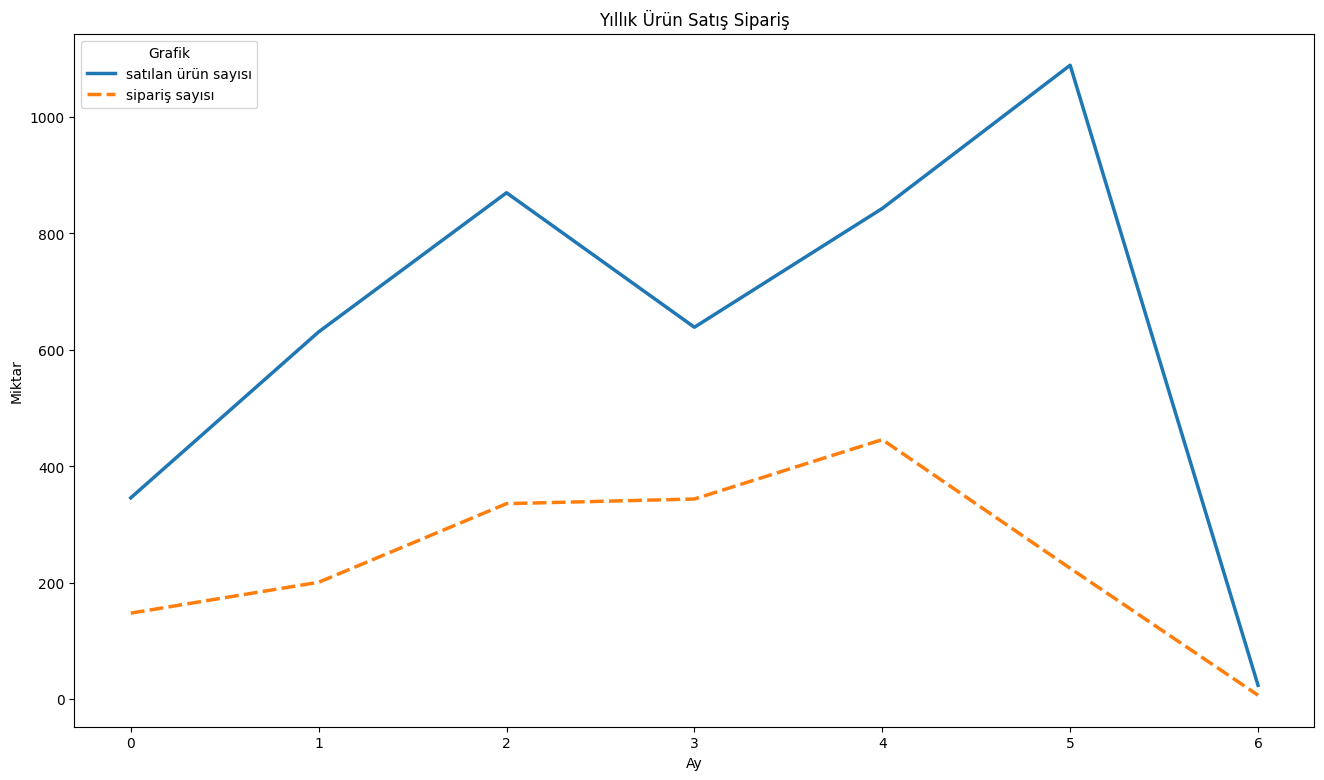

In [21]:
fig, ax = plt.subplots(figsize=(16,9),dpi=100)
sns.lineplot(df_year[["tarih","satılan ürün sayısı","sipariş sayısı"]], linewidth=2.5, palette="tab10")
plt.ylabel('Miktar')
plt.xlabel('Ay')
plt.title('Yıllık Ürün Satış Sipariş')
plt.legend(title='Grafik', loc='upper left');

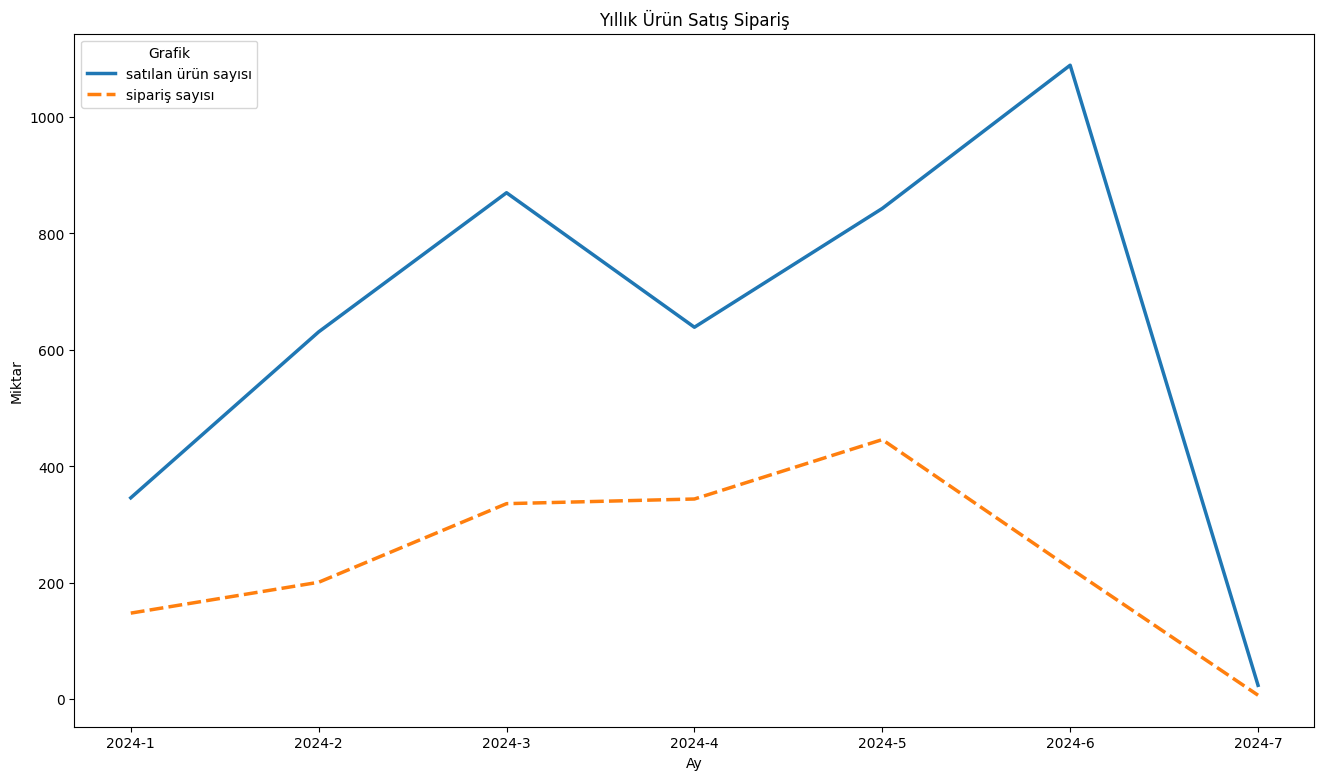

In [22]:
fig, ax = plt.subplots(figsize=(16,9),dpi=100)
sns.lineplot(df_year[["tarih","satılan ürün sayısı","sipariş sayısı"]], linewidth=2.5, palette="tab10")
plt.ylabel('Miktar')
plt.xlabel('Ay')

# giving xticks value manually
xlabel_value = list(df_year["tarih"])
ax.set_xticks([0,1,2,3,4,5,6])
ax.set_xticklabels(xlabel_value)

plt.title('Yıllık Ürün Satış Sipariş')
plt.legend(title='Grafik', loc='upper left');

<Axes: xlabel='tarih'>

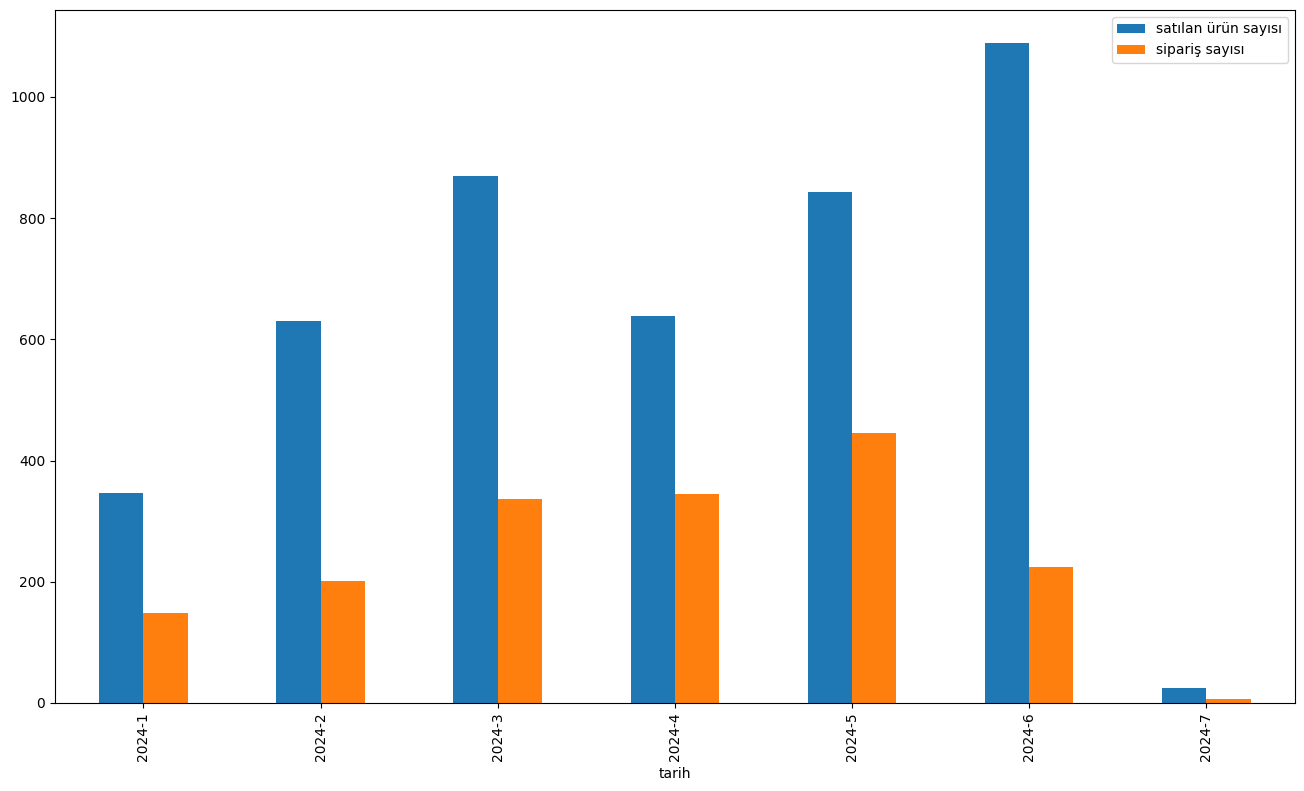

In [23]:
df_year.plot(x="tarih", y=["satılan ürün sayısı", "sipariş sayısı"], kind="bar", figsize=(16,9))

In [24]:
df_year.columns

Index(['tarih', 'satılan ürün sayısı', 'sipariş sayısı',
       'ortalama net satış tutarı', 'kupon tutarı', 'gönderim tutarı',
       'brüt satış miktarı', 'net satış tutarı', 'i̇ade tutarı',
       'sipariş ortalama ürün miktarı'],
      dtype='object')

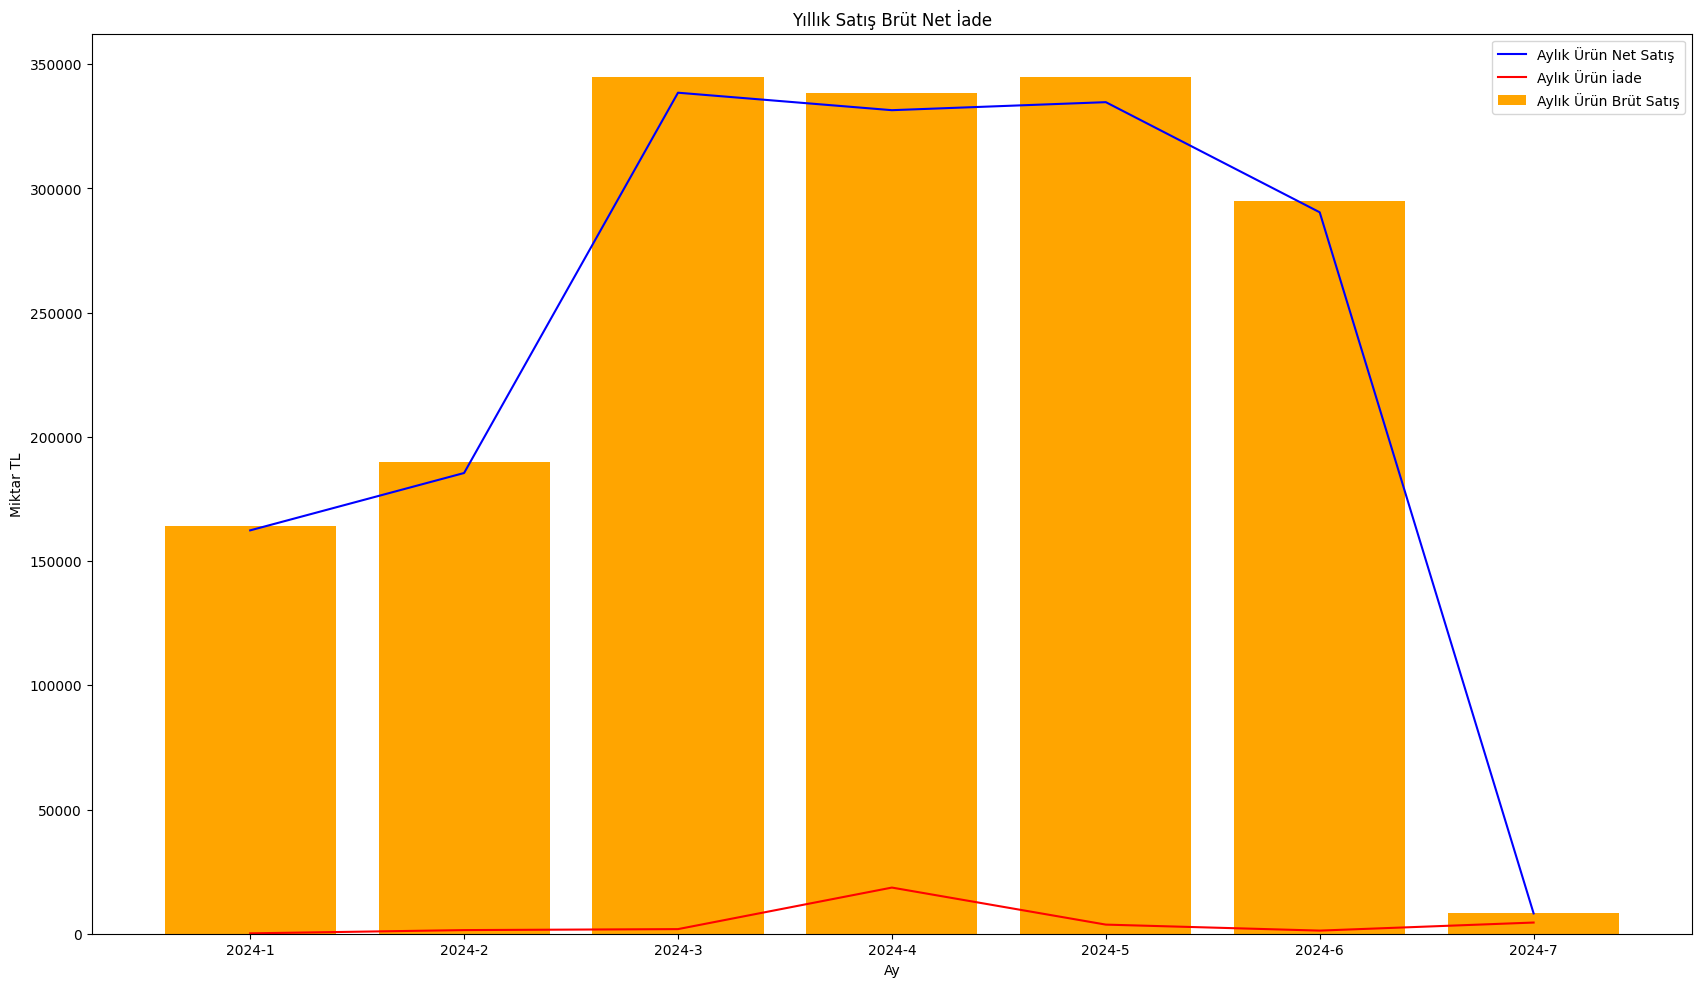

In [25]:
fig = plt.figure(figsize=(16,9), dpi=100)
ax = fig.add_axes([0,0,1,1])
ax.bar(df_year["tarih"],df_year["brüt satış miktarı"],label='Aylık Ürün Brüt Satış', color="orange")
ax.plot(df_year["tarih"],df_year["net satış tutarı"],label='Aylık Ürün Net Satış', color="blue")
ax.plot(df_year["tarih"],df_year["i̇ade tutarı"],label='Aylık Ürün İade', color="red")
ax.set_title("Yıllık Satış Brüt Net İade")
ax.set_ylabel("Miktar TL")
ax.set_xlabel("Ay")
ax.legend(loc=0);

In [26]:
df_year.columns

Index(['tarih', 'satılan ürün sayısı', 'sipariş sayısı',
       'ortalama net satış tutarı', 'kupon tutarı', 'gönderim tutarı',
       'brüt satış miktarı', 'net satış tutarı', 'i̇ade tutarı',
       'sipariş ortalama ürün miktarı'],
      dtype='object')

In [27]:
df_year_prod_num = df_year[["satılan ürün sayısı","sipariş sayısı"]]
df_year_prod_num

,satılan ürün sayısı,sipariş sayısı
0,346,148
1,631,201
2,870,336
3,639,344
4,843,446
5,1089,225
6,24,7


In [28]:

# col1_var = list(df_year_prod_num.columns)
# col2_var = [df_year_prod_num["satılan ürün sayısı"].sum(),df_year_prod_num["sipariş sayısı"].sum()]
# df_year_prod_num_sum = pd.DataFrame({"Name":col1_var, "Toplam":col2_var})
df_year_prod_num_sum = pd.DataFrame({"name":df_year_prod_num.columns, "toplam":[df_year_prod_num["satılan ürün sayısı"].sum(),df_year_prod_num["sipariş sayısı"].sum()]})
df_year_prod_num_sum

,name,toplam
0,satılan ürün sayısı,4442
1,sipariş sayısı,1707


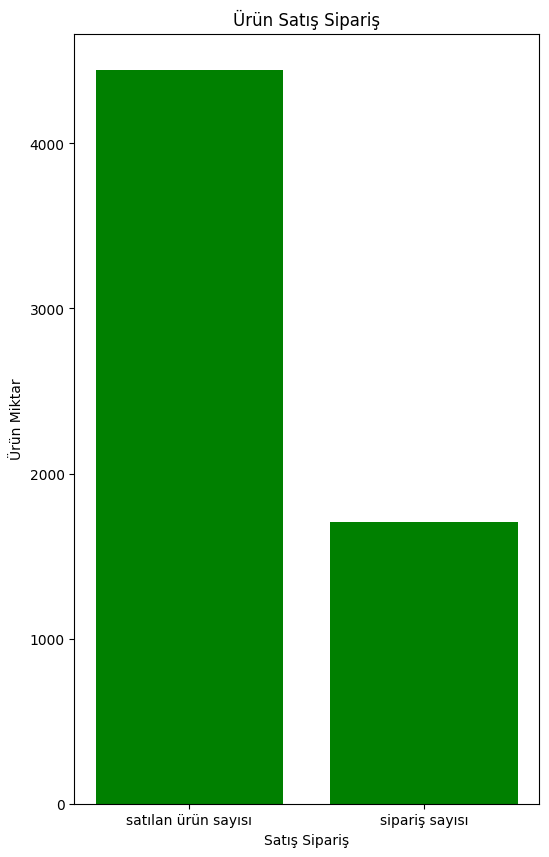

In [29]:
plt.figure(figsize=(6,10))
plt.bar(x=df_year_prod_num_sum["name"], height=df_year_prod_num_sum["toplam"], color="green")
plt.xlabel("Satış Sipariş")
plt.ylabel("Ürün Miktar")
plt.title("Ürün Satış Sipariş");

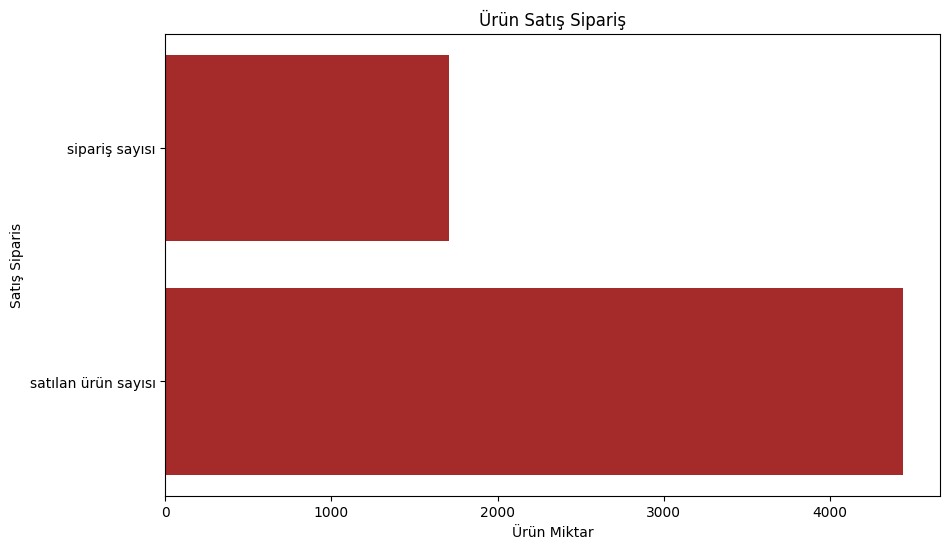

In [30]:
plt.figure(figsize=(10,6))
plt.barh(y=df_year_prod_num_sum["name"], width=df_year_prod_num_sum["toplam"], color="brown")
plt.ylabel("Satış Siparis")
plt.xlabel("Ürün Miktar")
plt.title("Ürün Satış Sipariş");

##### Month

In [31]:
df_month = pd.read_csv(r"C:\Users\user\Desktop\Data Analysis\Adoba\Sales_Report\Data\DoganBazaar\report-last_month-2024-07-04.csv")
df_month

,Tarih,Satılan ürün sayısı,Sipariş sayısı,Ortalama net satış tutarı,Kupon tutarı,Gönderim tutarı,Brüt satış miktarı,Net satış tutarı,İade tutarı
0,2024-6-1,38,20,9679.77,606.0,414.89,14641.24,14226.35,0.00
1,2024-6-2,25,17,0.00,0.0,609.86,7499.67,6889.81,0.00
2,2024-6-3,81,25,0.00,239.5,564.86,134594.08,134029.22,0.00
3,2024-6-4,28,19,0.00,0.0,529.87,13822.69,13292.82,0.00
4,2024-6-5,32,18,0.00,0.0,279.92,9008.57,8728.65,0.00
5,2024-6-6,18,10,0.00,0.0,69.98,6319.84,6249.86,0.00
6,2024-6-7,41,12,0.00,0.0,139.96,16283.43,16143.47,0.00
7,2024-6-8,17,10,0.00,0.0,34.99,8928.89,8893.90,0.00
8,2024-6-9,52,17,0.00,0.0,139.96,13040.59,12900.63,0.00
9,2024-6-10,144,13,0.00,0.0,169.96,13667.77,13497.81,0.00


In [32]:
df_month.columns = [x.lower() for x in df_month.columns]

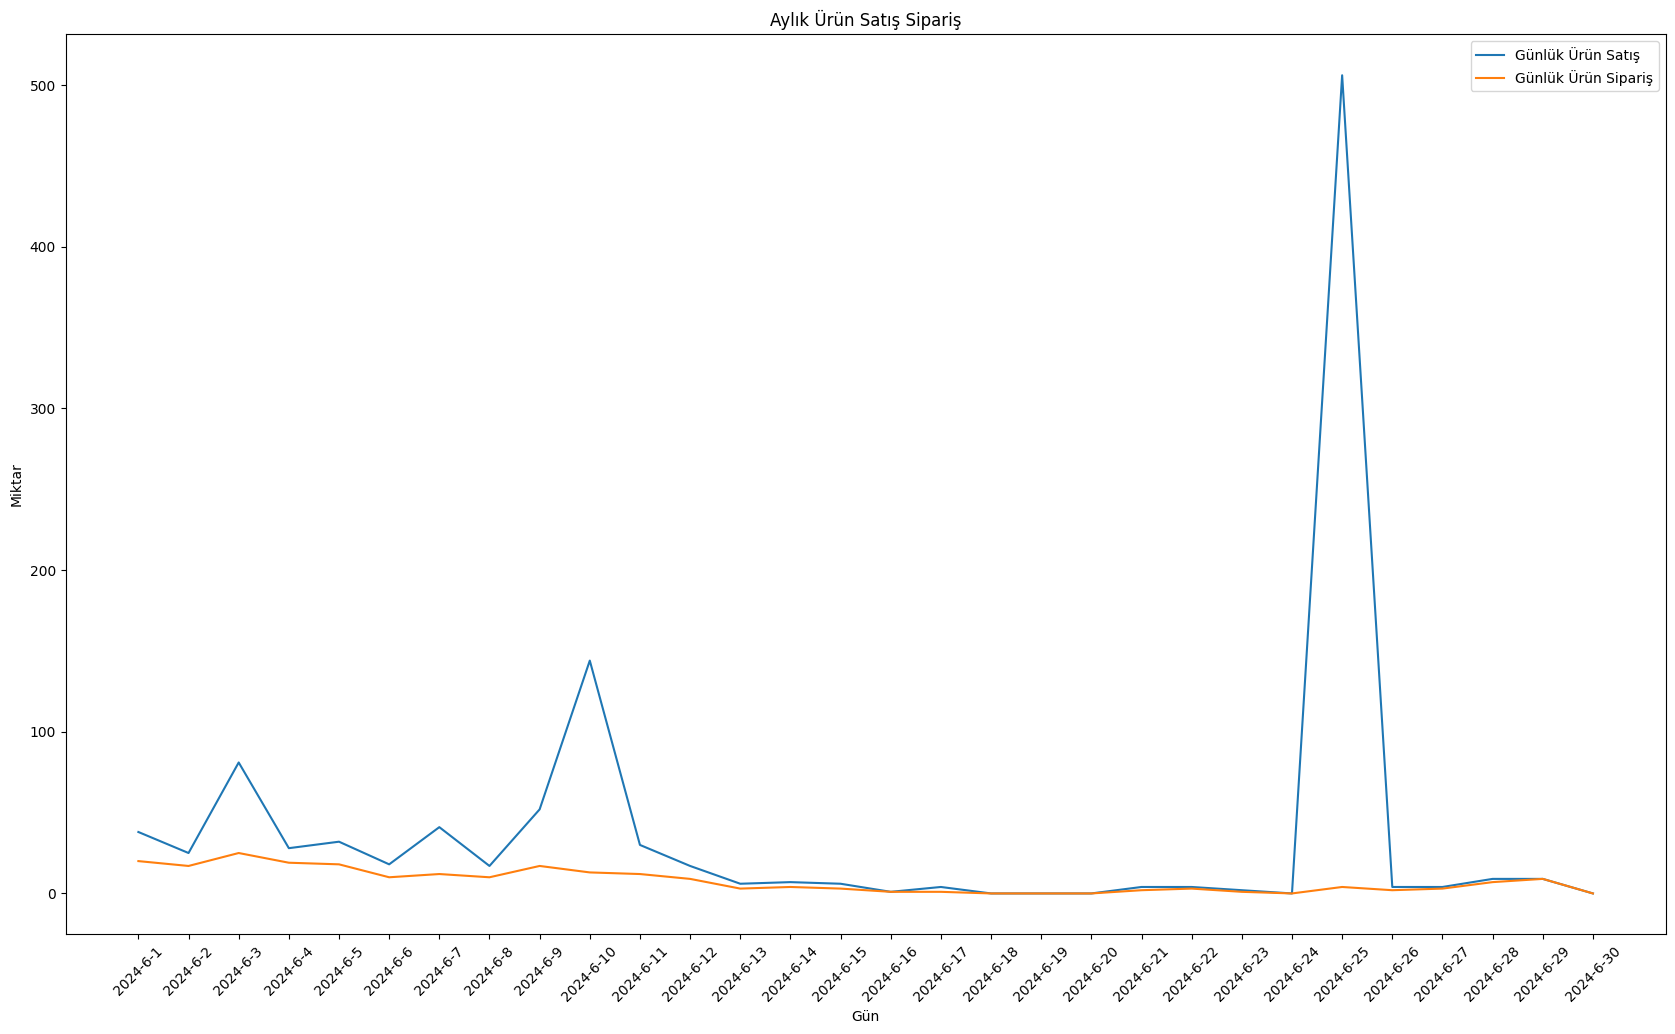

In [33]:
fig = plt.figure(figsize=(16,9), dpi=100)
ax = fig.add_axes([0,0,1,1])
ax.plot(df_month["tarih"],df_month["satılan ürün sayısı"],label='Günlük Ürün Satış')
ax.plot(df_month["tarih"],df_month["sipariş sayısı"],label="Günlük Ürün Sipariş")

# ax.set_title("Aylık Ürün Satış Sipariş")
# ax.set_ylabel("Miktar")
# ax.set_xlabel("Gün")
# ax.set_xticklabels(list(df_month["tarih"]), rotation=45)

plt.title("Aylık Ürün Satış Sipariş")
plt.ylabel("Miktar")
plt.xlabel("Gün")
plt.xticks(list(df_month["tarih"]), rotation=45)

ax.legend(loc=0);

Text(0.5, 1.0, 'Brüt Net Satış')

<Figure size 1600x900 with 0 Axes>

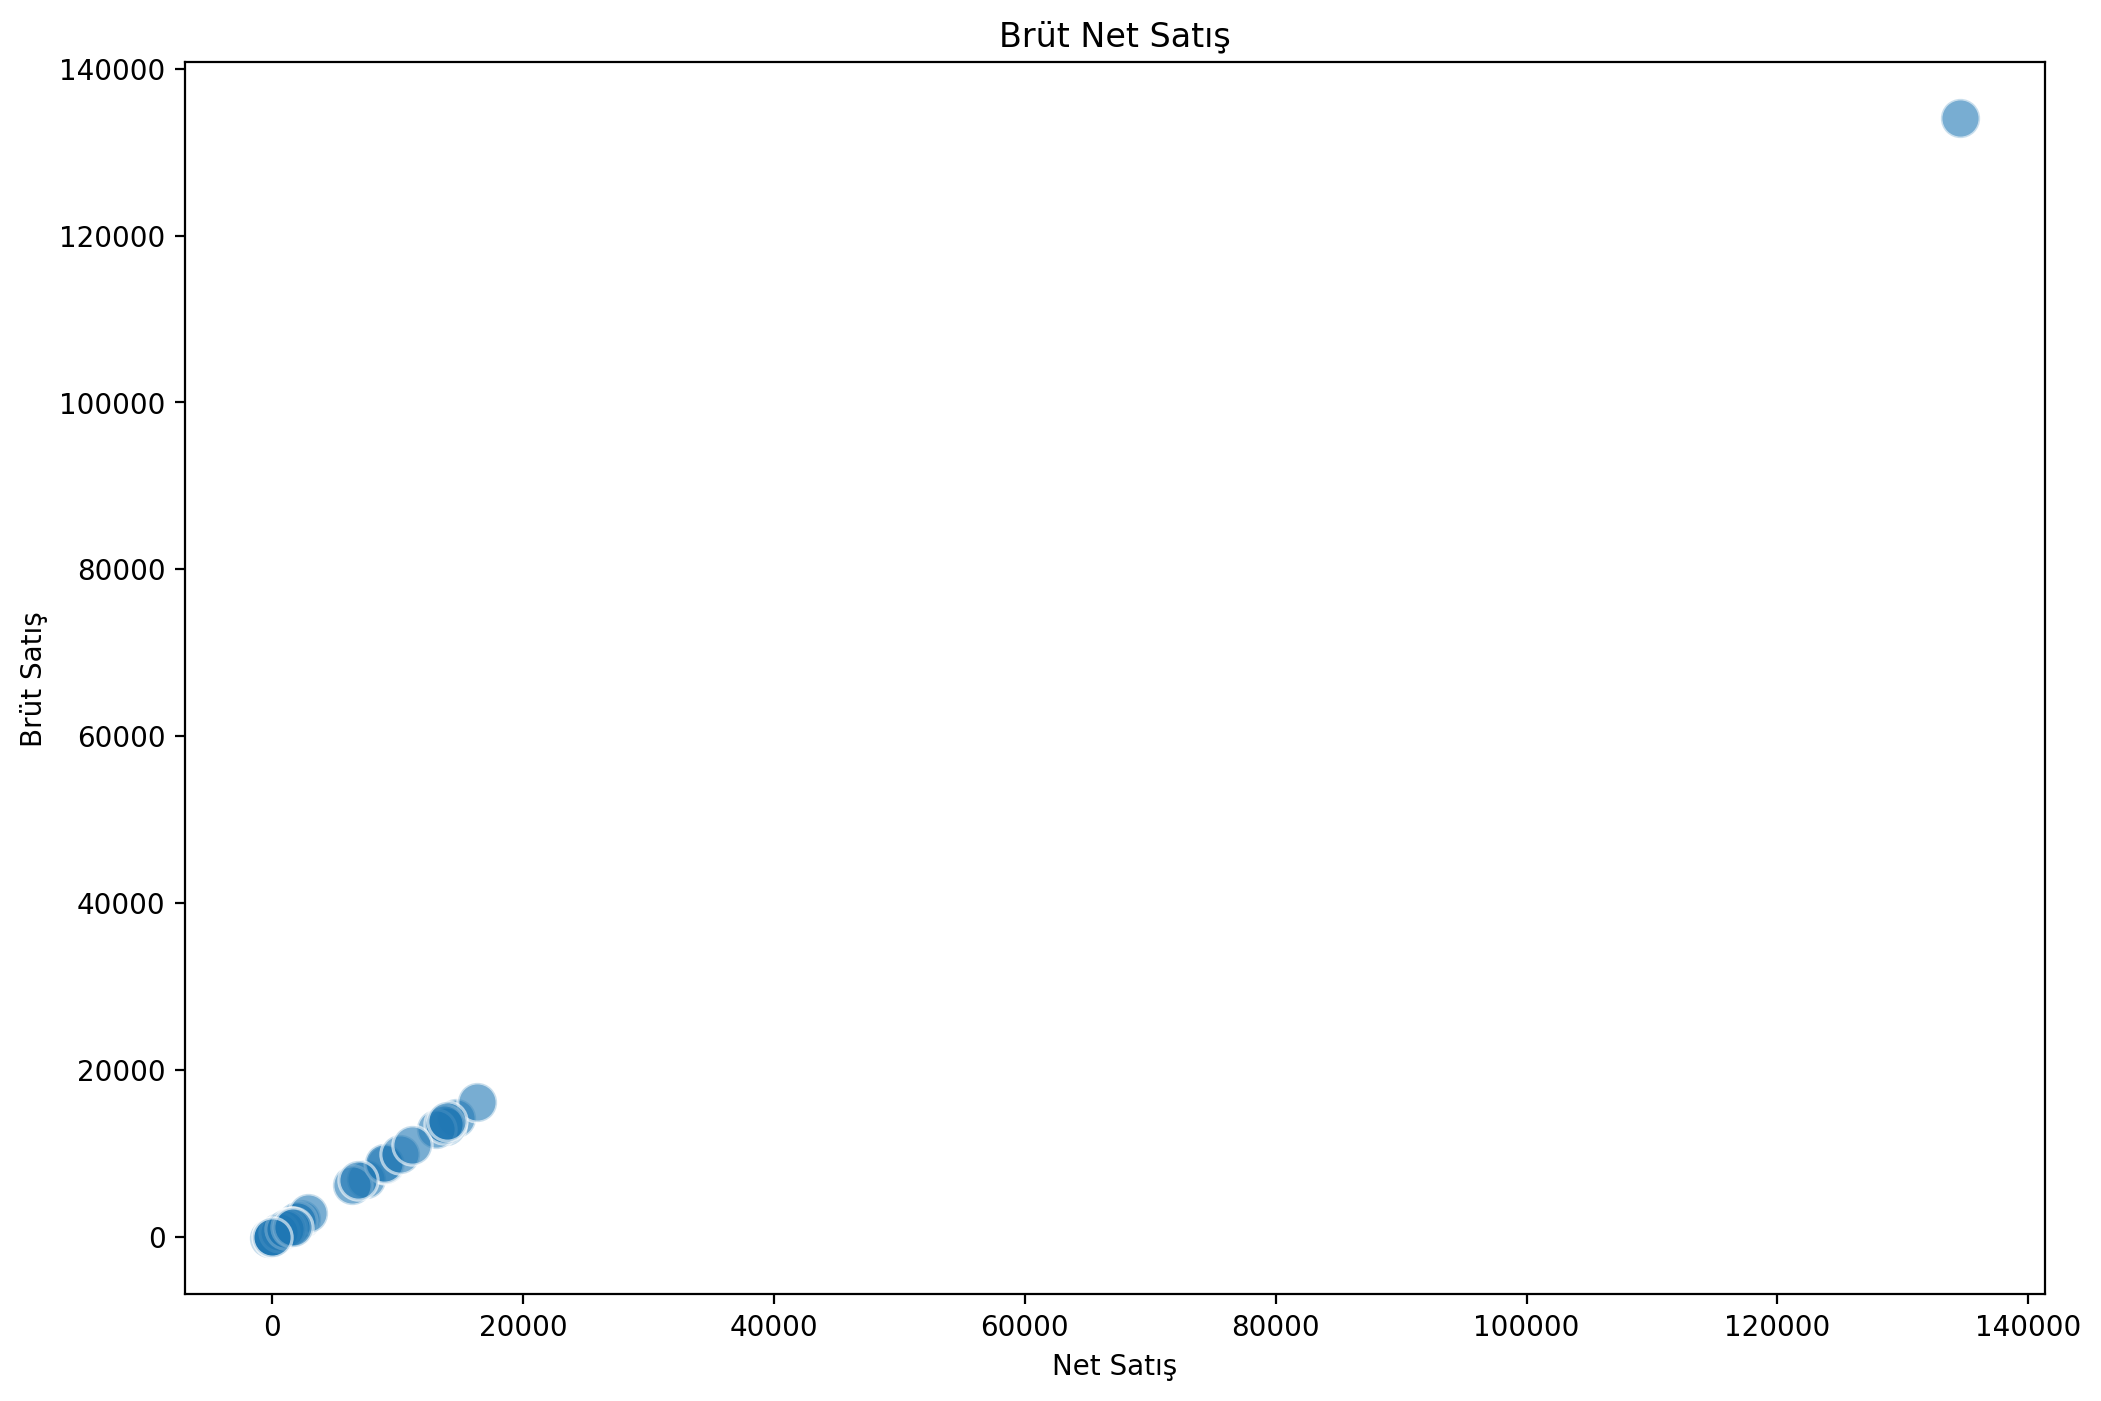

In [34]:
fig = plt.figure(figsize=(16,9), dpi=100)
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x="brüt satış miktarı", y="net satış tutarı", data=df_month,s=200,alpha=0.6)
plt.xlabel("Net Satış")
plt.ylabel("Brüt Satış")
plt.title("Brüt Net Satış")

#### Trendyol

##### Category

In [35]:
df_category_seller_year = pd.read_excel(r"C:\Users\user\Desktop\Data Analysis\Adoba\Sales_Report\Data\Trendyol\Year\Kategori\seller-356254-kategori-bazlı-satış-raporu-2024.07.02-13.55.55.xlsx")
df_category_seller_year

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:241: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Kategori,Brüt Satış Adedi,İptal Adedi,İptal Oranı,İade Adedi,İade Oranı,Net Satış Adedi,Brüt Ciro,Net Ciro,Toplam Komisyon Tutarı,Ortalama Komisyon Tutarı,Ortalama Komisyon Oranı,Ortalama Satış Fiyatı
0,Kedi ve Köpek Mama Su Kabı,17609,601,3.41,749,4.25,16259,3428004,3117615,535474.92,32.93,17.18,191.75
1,Türk Kahvesi Makinesi,5262,269,5.11,700,13.30,4293,3315973,2699888,140009.85,32.61,5.19,628.90
2,Tost Makinesi,5608,221,3.94,449,8.01,4938,2763155,2415761,222969.58,45.15,9.23,489.22
3,Evcilik ve Mutfak Setleri,923,38,4.12,20,2.17,865,1951493,1822228,253964.23,293.60,13.94,2106.62
4,Çay Makinesi,3820,161,4.21,231,6.05,3428,1770599,1590258,135304.83,39.47,8.51,463.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,Glutensiz Ürün,1,0,0.00,0,0.00,1,53,53,8.08,8.08,15.25,53.00
232,Kuru Kayısı,1,0,0.00,0,0.00,1,50,50,7.63,7.63,15.26,50.00
233,El Rondosu,1,1,100.00,0,0.00,0,355,0,0.00,0.00,0.00,0.00
234,Cüzdan,2,2,100.00,0,0.00,0,898,0,0.00,0.00,0.00,0.00


In [36]:
# df_category_seller_year.isnull()

In [37]:
df_category_seller_year.columns = [x.lower() for x in df_category_seller_year.columns]
df_category_seller_year

,kategori,brüt satış adedi,i̇ptal adedi,i̇ptal oranı,i̇ade adedi,i̇ade oranı,net satış adedi,brüt ciro,net ciro,toplam komisyon tutarı,ortalama komisyon tutarı,ortalama komisyon oranı,ortalama satış fiyatı
0,Kedi ve Köpek Mama Su Kabı,17609,601,3.41,749,4.25,16259,3428004,3117615,535474.92,32.93,17.18,191.75
1,Türk Kahvesi Makinesi,5262,269,5.11,700,13.30,4293,3315973,2699888,140009.85,32.61,5.19,628.90
2,Tost Makinesi,5608,221,3.94,449,8.01,4938,2763155,2415761,222969.58,45.15,9.23,489.22
3,Evcilik ve Mutfak Setleri,923,38,4.12,20,2.17,865,1951493,1822228,253964.23,293.60,13.94,2106.62
4,Çay Makinesi,3820,161,4.21,231,6.05,3428,1770599,1590258,135304.83,39.47,8.51,463.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,Glutensiz Ürün,1,0,0.00,0,0.00,1,53,53,8.08,8.08,15.25,53.00
232,Kuru Kayısı,1,0,0.00,0,0.00,1,50,50,7.63,7.63,15.26,50.00
233,El Rondosu,1,1,100.00,0,0.00,0,355,0,0.00,0.00,0.00,0.00
234,Cüzdan,2,2,100.00,0,0.00,0,898,0,0.00,0.00,0.00,0.00


In [38]:
df_category_seller_year = df_category_seller_year.dropna()

In [39]:
object_columns = df_category_seller_year.select_dtypes(include='object')
object_columns

,kategori
0,Kedi ve Köpek Mama Su Kabı
1,Türk Kahvesi Makinesi
2,Tost Makinesi
3,Evcilik ve Mutfak Setleri
4,Çay Makinesi
...,...
231,Glutensiz Ürün
232,Kuru Kayısı
233,El Rondosu
234,Cüzdan


In [40]:
df_category_seller_year[object_columns.columns] = object_columns.apply(lambda x: x.str.lower())
df_category_seller_year

,kategori,brüt satış adedi,i̇ptal adedi,i̇ptal oranı,i̇ade adedi,i̇ade oranı,net satış adedi,brüt ciro,net ciro,toplam komisyon tutarı,ortalama komisyon tutarı,ortalama komisyon oranı,ortalama satış fiyatı
0,kedi ve köpek mama su kabı,17609,601,3.41,749,4.25,16259,3428004,3117615,535474.92,32.93,17.18,191.75
1,türk kahvesi makinesi,5262,269,5.11,700,13.30,4293,3315973,2699888,140009.85,32.61,5.19,628.90
2,tost makinesi,5608,221,3.94,449,8.01,4938,2763155,2415761,222969.58,45.15,9.23,489.22
3,evcilik ve mutfak setleri,923,38,4.12,20,2.17,865,1951493,1822228,253964.23,293.60,13.94,2106.62
4,çay makinesi,3820,161,4.21,231,6.05,3428,1770599,1590258,135304.83,39.47,8.51,463.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,glutensiz ürün,1,0,0.00,0,0.00,1,53,53,8.08,8.08,15.25,53.00
232,kuru kayısı,1,0,0.00,0,0.00,1,50,50,7.63,7.63,15.26,50.00
233,el rondosu,1,1,100.00,0,0.00,0,355,0,0.00,0.00,0.00,0.00
234,cüzdan,2,2,100.00,0,0.00,0,898,0,0.00,0.00,0.00,0.00


In [41]:
df_category_seller_year.kategori.nunique()

236

In [42]:
df_category_seller_year_var1 = df_category_seller_year.sort_values(by="net satış adedi", ascending=False)
df_category_seller_year_var1.reset_index(drop=True, inplace=True)
df_category_seller_year_var1

,kategori,brüt satış adedi,i̇ptal adedi,i̇ptal oranı,i̇ade adedi,i̇ade oranı,net satış adedi,brüt ciro,net ciro,toplam komisyon tutarı,ortalama komisyon tutarı,ortalama komisyon oranı,ortalama satış fiyatı
0,kedi ve köpek mama su kabı,17609,601,3.41,749,4.25,16259,3428004,3117615,535474.92,32.93,17.18,191.75
1,dolap i̇çi düzenleyici,6067,162,2.67,129,2.13,5776,1039015,974037,167429.13,28.99,17.19,168.64
2,kamp masası,5328,186,3.49,132,2.48,5010,847424,794947,50851.16,10.15,6.40,158.67
3,tost makinesi,5608,221,3.94,449,8.01,4938,2763155,2415761,222969.58,45.15,9.23,489.22
4,türk kahvesi makinesi,5262,269,5.11,700,13.30,4293,3315973,2699888,140009.85,32.61,5.19,628.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,çatal & bıçak & kaşık,1,0,0.00,0,0.00,1,200,200,30.50,30.50,15.25,200.00
232,banyo düzenleyici,2,0,0.00,1,50.00,1,285,200,32.54,32.54,16.27,200.00
233,el rondosu,1,1,100.00,0,0.00,0,355,0,0.00,0.00,0.00,0.00
234,cüzdan,2,2,100.00,0,0.00,0,898,0,0.00,0.00,0.00,0.00


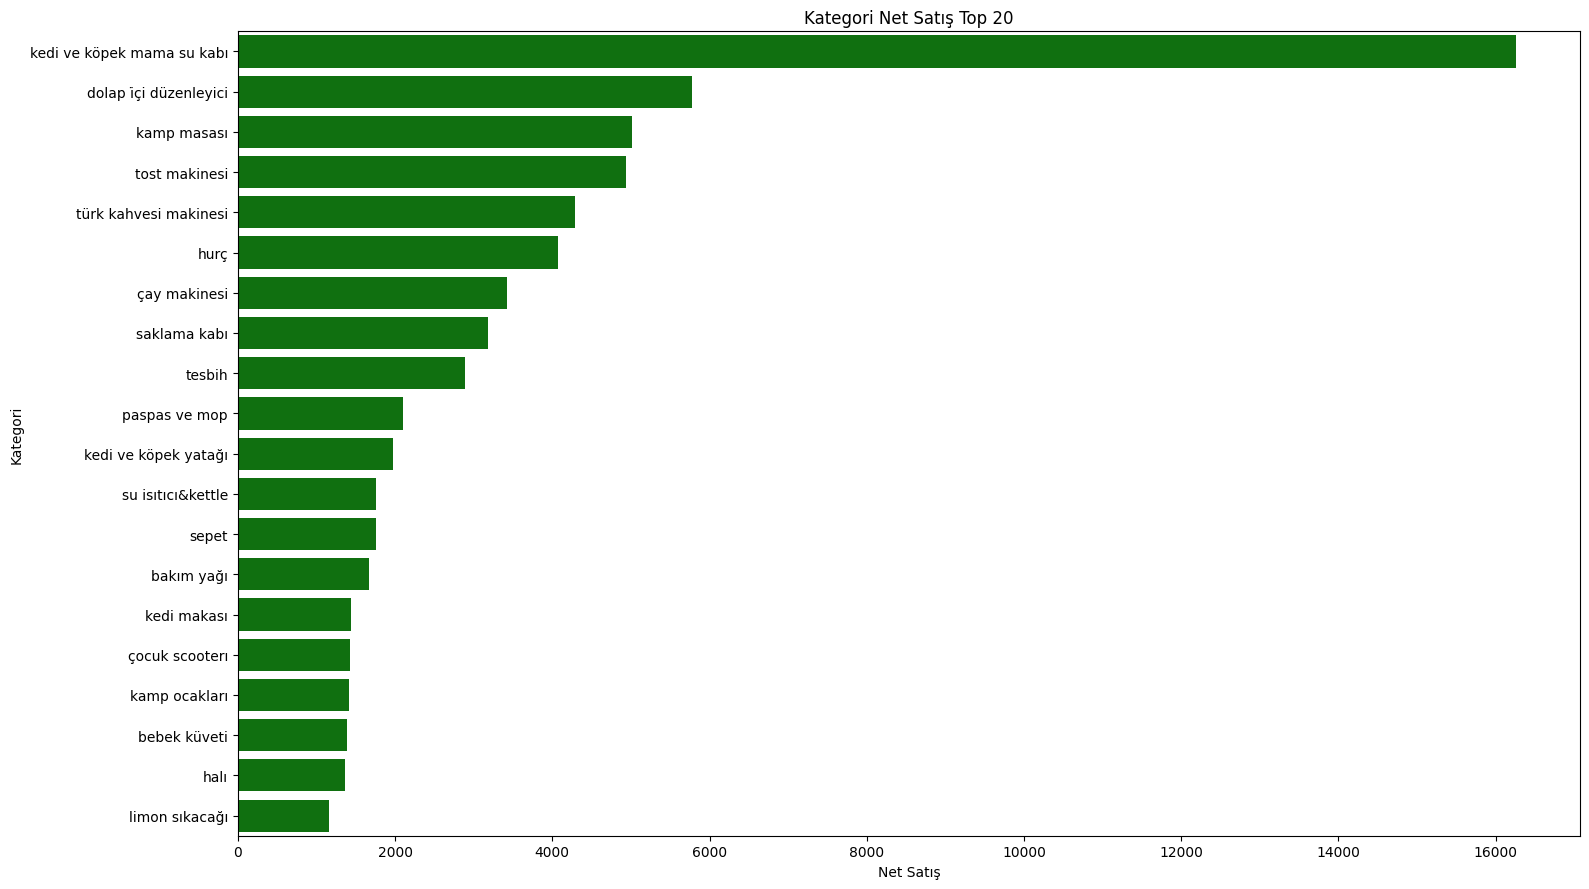

In [43]:
fig, ax = plt.subplots(figsize=(16,9), dpi=100)
sns.barplot(y=df_category_seller_year_var1["kategori"].head(20), x=df_category_seller_year_var1["net satış adedi"].head(20), color="green")
# sns.barplot(y=df_category_seller_year_var1["kategori"], x=df_category_seller_year_var1["net satış adedi"], color="gray")
plt.xlabel("Net Satış")
plt.ylabel("Kategori")
# plt.ylim(20)
plt.title("Kategori Net Satış Top 20")
plt.tight_layout();

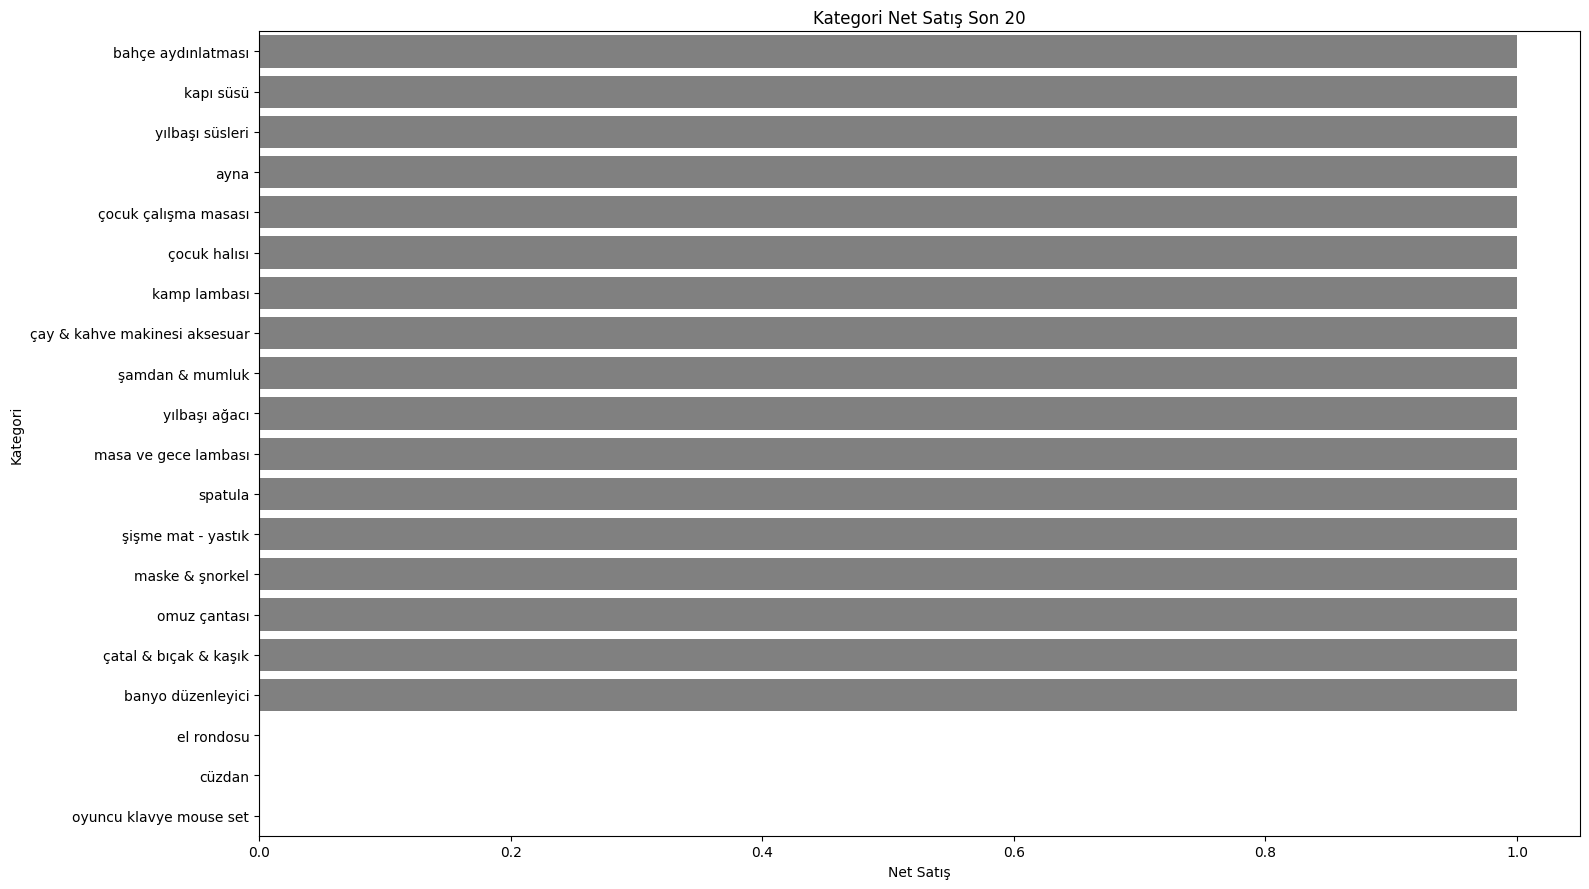

In [44]:
fig, ax = plt.subplots(figsize=(16,9), dpi=100)
sns.barplot(y=df_category_seller_year_var1["kategori"].tail(20), x=df_category_seller_year_var1["net satış adedi"].tail(20), color="gray")
plt.xlabel("Net Satış")
plt.ylabel("Kategori")
plt.title("Kategori Net Satış Son 20")
plt.tight_layout();

In [45]:
df_category_seller_year.columns

Index(['kategori', 'brüt satış adedi', 'i̇ptal adedi', 'i̇ptal oranı',
       'i̇ade adedi', 'i̇ade oranı', 'net satış adedi', 'brüt ciro',
       'net ciro', 'toplam komisyon tutarı', 'ortalama komisyon tutarı',
       'ortalama komisyon oranı', 'ortalama satış fiyatı'],
      dtype='object')

In [46]:
df_category_seller_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   kategori                  236 non-null    object 
 1   brüt satış adedi          236 non-null    int64  
 2   i̇ptal adedi              236 non-null    int64  
 3   i̇ptal oranı              236 non-null    float64
 4   i̇ade adedi               236 non-null    int64  
 5   i̇ade oranı               236 non-null    float64
 6   net satış adedi           236 non-null    int64  
 7   brüt ciro                 236 non-null    int64  
 8   net ciro                  236 non-null    int64  
 9   toplam komisyon tutarı    236 non-null    float64
 10  ortalama komisyon tutarı  236 non-null    float64
 11  ortalama komisyon oranı   236 non-null    float64
 12  ortalama satış fiyatı     236 non-null    float64
dtypes: float64(6), int64(6), object(1)
memory usage: 24.1+ KB


In [47]:
df_category_seller_year.sort_values("net ciro", ascending=False).head(20)

,kategori,brüt satış adedi,i̇ptal adedi,i̇ptal oranı,i̇ade adedi,i̇ade oranı,net satış adedi,brüt ciro,net ciro,toplam komisyon tutarı,ortalama komisyon tutarı,ortalama komisyon oranı,ortalama satış fiyatı
0,kedi ve köpek mama su kabı,17609,601,3.41,749,4.25,16259,3428004,3117615,535474.92,32.93,17.18,191.75
1,türk kahvesi makinesi,5262,269,5.11,700,13.30,4293,3315973,2699888,140009.85,32.61,5.19,628.90
2,tost makinesi,5608,221,3.94,449,8.01,4938,2763155,2415761,222969.58,45.15,9.23,489.22
3,evcilik ve mutfak setleri,923,38,4.12,20,2.17,865,1951493,1822228,253964.23,293.60,13.94,2106.62
4,çay makinesi,3820,161,4.21,231,6.05,3428,1770599,1590258,135304.83,39.47,8.51,463.90
5,hurç,4373,174,3.98,122,2.79,4077,1554488,1438044,254964.14,62.54,17.73,352.72
6,saklama kabı,3665,158,4.31,327,8.92,3180,1564090,1353145,206393.95,64.90,15.25,425.52
7,çocuk scooterı,1614,107,6.63,78,4.83,1429,1301075,1139440,108334.70,75.81,9.51,797.37
8,ahşap oyuncaklar,796,23,2.89,33,4.15,740,1229703,1137316,137520.69,185.84,12.09,1536.91
9,dolap i̇çi düzenleyici,6067,162,2.67,129,2.13,5776,1039015,974037,167429.13,28.99,17.19,168.64


In [48]:
df_category_seller_year.sort_values("i̇ade oranı", ascending=False).reset_index(drop=True)

,kategori,brüt satış adedi,i̇ptal adedi,i̇ptal oranı,i̇ade adedi,i̇ade oranı,net satış adedi,brüt ciro,net ciro,toplam komisyon tutarı,ortalama komisyon tutarı,ortalama komisyon oranı,ortalama satış fiyatı
0,banyo düzenleyici,2,0,0.00,1,50.00,1,285,200,32.54,32.54,16.27,200.00
1,çay & kahve makinesi aksesuar,2,0,0.00,1,50.00,1,1430,690,117.30,117.30,17.00,690.00
2,yılbaşı süsleri,2,0,0.00,1,50.00,1,540,190,38.64,38.64,20.34,190.00
3,kamp yemek seti,2,0,0.00,1,50.00,1,900,450,68.63,68.63,15.25,450.00
4,diğer oda aksesuarları,17,0,0.00,6,35.29,11,1989,1296,149.58,13.60,11.54,117.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,yüz temizleme fırçası,14,0,0.00,0,0.00,14,1325,1305,211.74,15.12,16.23,93.21
232,kutu oyunları,55,3,5.45,0,0.00,52,5659,5424,799.66,15.38,14.74,104.31
233,köpek aksesuarı,12,1,8.33,0,0.00,11,1707,1466,261.37,23.76,17.83,133.27
234,alez,8,0,0.00,0,0.00,8,1531,1531,264.50,33.06,17.28,191.38


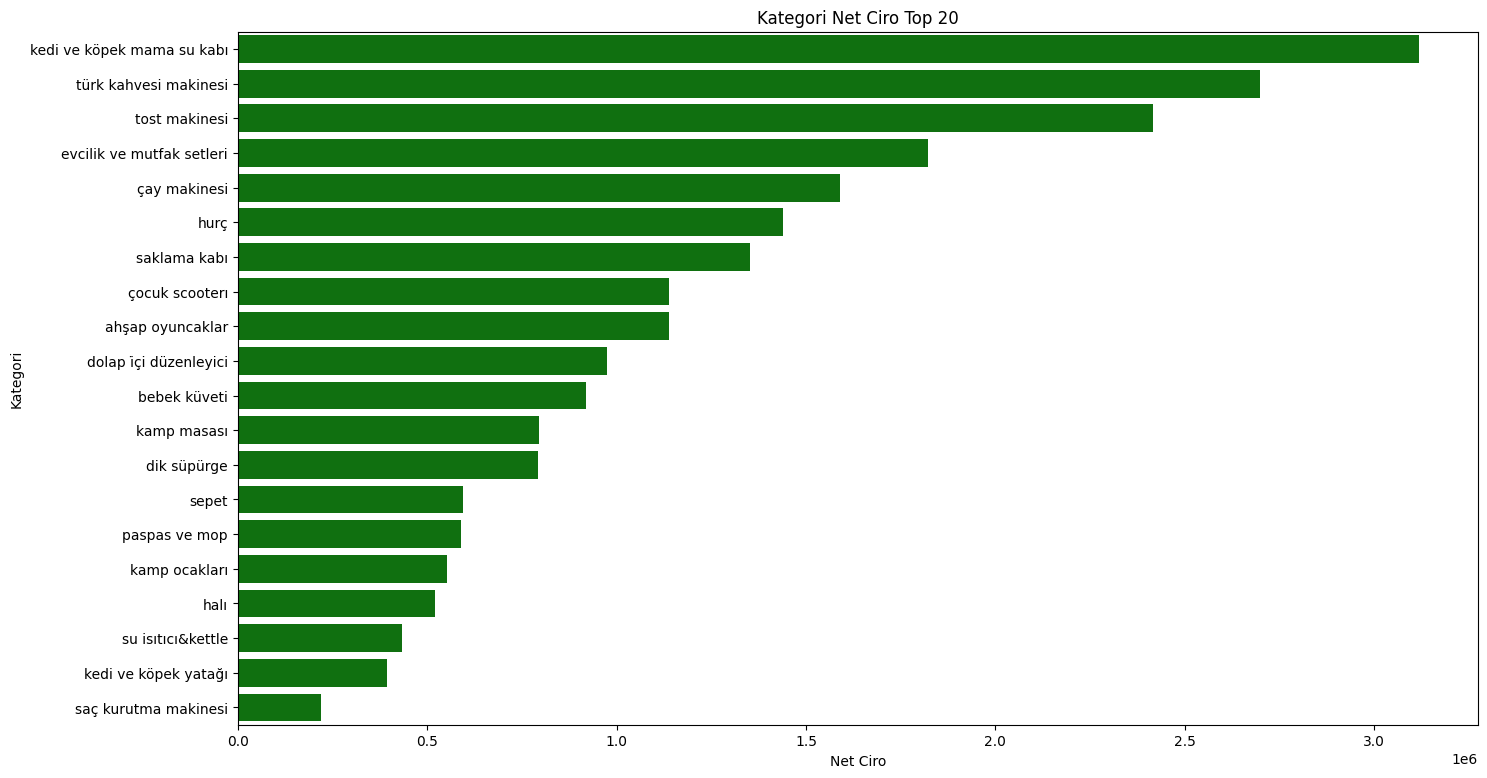

In [49]:
fig, ax = plt.subplots(figsize=(16,9), dpi=100)
sns.barplot(y=df_category_seller_year["kategori"].head(20), x=df_category_seller_year["net ciro"].head(20), color="green", order=df_category_seller_year.sort_values("net ciro", ascending=False).kategori.head(20))
# sns.barplot(y=df_category_seller_year["kategori"], x=df_category_seller_year["net ciro"], color="orange", order=df_category_seller_year.sort_values("net ciro", ascending=False).kategori)
plt.xlabel("Net Ciro")
plt.ylabel("Kategori")
# plt.ylim(20)
plt.title("Kategori Net Ciro Top 20");

In [50]:
df_category_seller_year.sort_values("net satış adedi", ascending=False).head(20)

,kategori,brüt satış adedi,i̇ptal adedi,i̇ptal oranı,i̇ade adedi,i̇ade oranı,net satış adedi,brüt ciro,net ciro,toplam komisyon tutarı,ortalama komisyon tutarı,ortalama komisyon oranı,ortalama satış fiyatı
0,kedi ve köpek mama su kabı,17609,601,3.41,749,4.25,16259,3428004,3117615,535474.92,32.93,17.18,191.75
9,dolap i̇çi düzenleyici,6067,162,2.67,129,2.13,5776,1039015,974037,167429.13,28.99,17.19,168.64
11,kamp masası,5328,186,3.49,132,2.48,5010,847424,794947,50851.16,10.15,6.40,158.67
2,tost makinesi,5608,221,3.94,449,8.01,4938,2763155,2415761,222969.58,45.15,9.23,489.22
1,türk kahvesi makinesi,5262,269,5.11,700,13.30,4293,3315973,2699888,140009.85,32.61,5.19,628.90
5,hurç,4373,174,3.98,122,2.79,4077,1554488,1438044,254964.14,62.54,17.73,352.72
4,çay makinesi,3820,161,4.21,231,6.05,3428,1770599,1590258,135304.83,39.47,8.51,463.90
6,saklama kabı,3665,158,4.31,327,8.92,3180,1564090,1353145,206393.95,64.90,15.25,425.52
38,tesbih,3163,237,7.49,35,1.11,2891,72923,67317,14798.76,5.12,21.98,23.29
14,paspas ve mop,2289,61,2.66,126,5.50,2102,644805,589656,72346.87,34.42,12.27,280.52


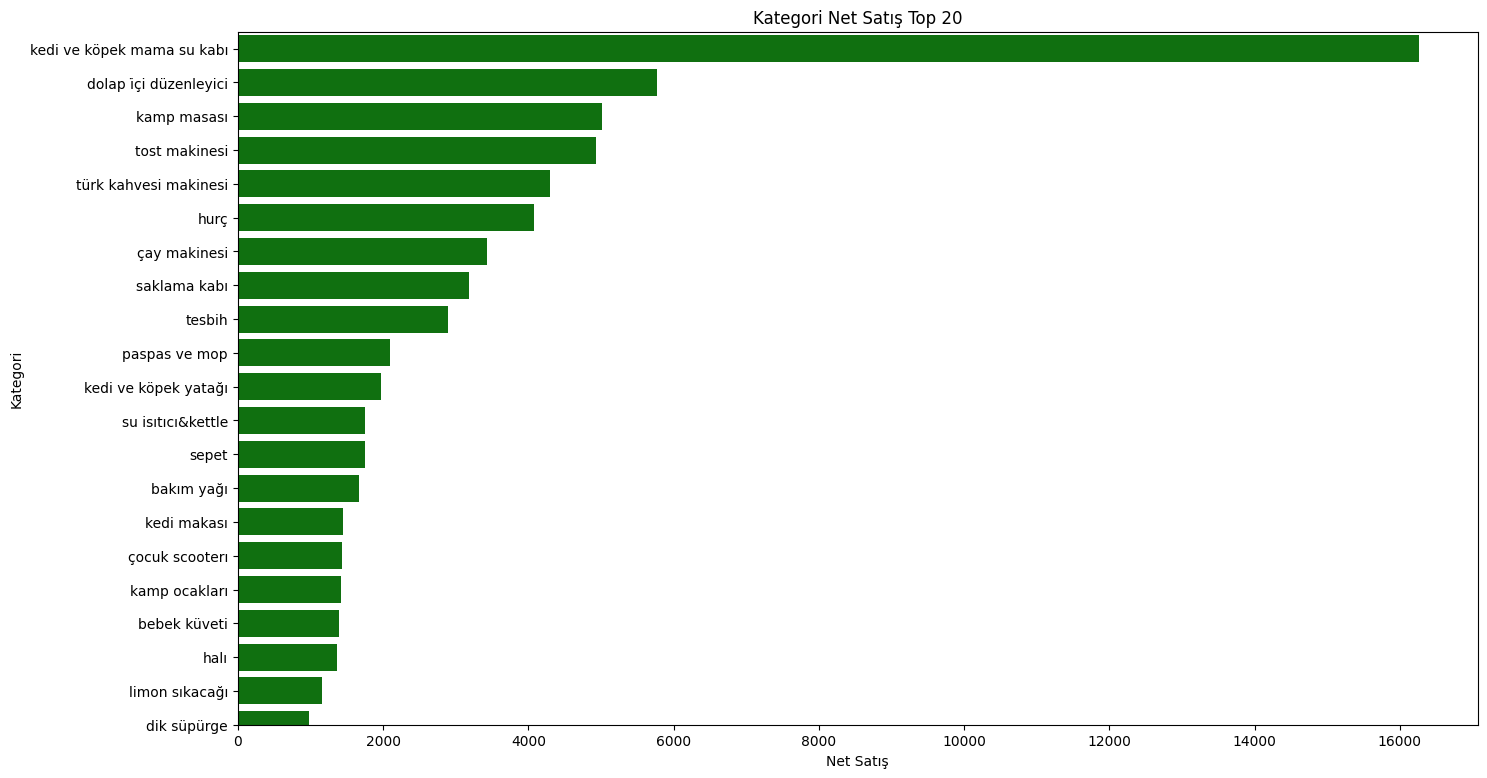

In [51]:
fig, ax = plt.subplots(figsize=(16,9), dpi=100)
sns.barplot(y=df_category_seller_year["kategori"], x=df_category_seller_year["net satış adedi"], color="green", order=df_category_seller_year.sort_values("net satış adedi", ascending=False).kategori)
plt.xlabel("Net Satış")
plt.ylabel("Kategori")
plt.ylim(20)
plt.title("Kategori Net Satış Top 20");

In [52]:
df_category_seller_year_var2 = df_category_seller_year.sort_values("i̇ade oranı", ascending=False)
df_category_seller_year_var2.reset_index(drop=True)
df_category_seller_year_var2

,kategori,brüt satış adedi,i̇ptal adedi,i̇ptal oranı,i̇ade adedi,i̇ade oranı,net satış adedi,brüt ciro,net ciro,toplam komisyon tutarı,ortalama komisyon tutarı,ortalama komisyon oranı,ortalama satış fiyatı
215,banyo düzenleyici,2,0,0.00,1,50.00,1,285,200,32.54,32.54,16.27,200.00
185,çay & kahve makinesi aksesuar,2,0,0.00,1,50.00,1,1430,690,117.30,117.30,17.00,690.00
217,yılbaşı süsleri,2,0,0.00,1,50.00,1,540,190,38.64,38.64,20.34,190.00
197,kamp yemek seti,2,0,0.00,1,50.00,1,900,450,68.63,68.63,15.25,450.00
159,diğer oda aksesuarları,17,0,0.00,6,35.29,11,1989,1296,149.58,13.60,11.54,117.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,yüz temizleme fırçası,14,0,0.00,0,0.00,14,1325,1305,211.74,15.12,16.23,93.21
99,kutu oyunları,55,3,5.45,0,0.00,52,5659,5424,799.66,15.38,14.74,104.31
154,köpek aksesuarı,12,1,8.33,0,0.00,11,1707,1466,261.37,23.76,17.83,133.27
153,alez,8,0,0.00,0,0.00,8,1531,1531,264.50,33.06,17.28,191.38


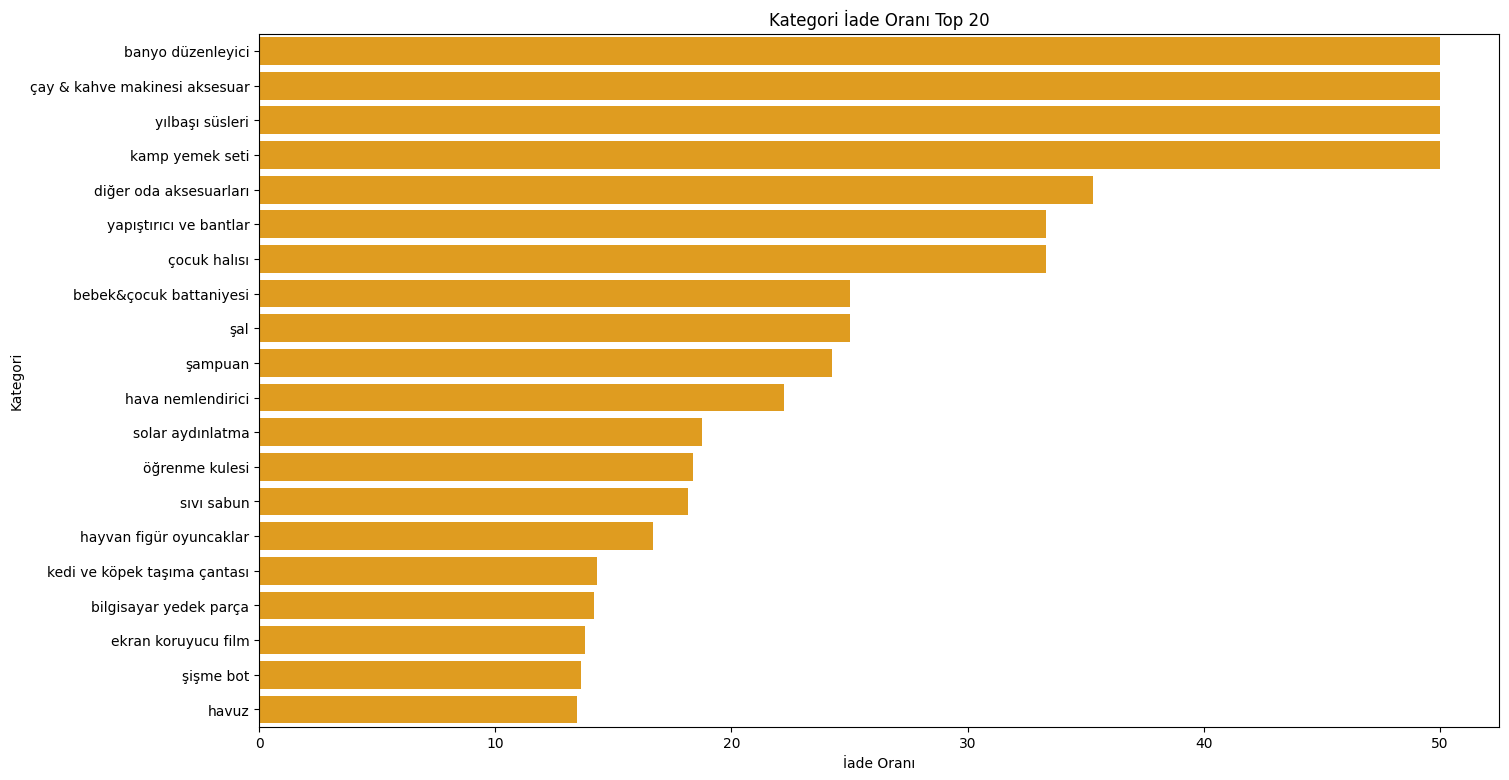

In [53]:
fig, ax = plt.subplots(figsize=(16,9), dpi=100)
sns.barplot(y=df_category_seller_year_var2["kategori"].head(20), x=df_category_seller_year_var2["i̇ade oranı"].head(20), color="orange");
# ax.set_xticks(np.arange(0, 101, 5))
plt.xlabel("İade Oranı")
plt.ylabel("Kategori")
plt.title("Kategori İade Oranı Top 20");

In [54]:
df_category_cancel_year = pd.read_excel(r"C:\Users\user\Desktop\Data Analysis\Adoba\Sales_Report\Data\Trendyol\Year\Kategori\seller-356254-kategori-bazlı-iptal-raporu-2024.07.02-13.56.27.xlsx")
df_category_cancel_year

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:241: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Kategori,Brüt Ciro,Tahmini Satış Kaybı,Brüt Satış Adedi,İptal Adedi,İptal Oranı,Müşterinin İptal Ettiği,Trendyol'un İptal Ettiği,Benim İptal Ettiğim
0,Kedi ve Köpek Mama Su Kabı,3428004,120544.48,17609,601,3.41,595,6,0
1,Türk Kahvesi Makinesi,3315973,167241.49,5262,269,5.11,239,30,0
2,Tesbih,72923,4077.05,3163,237,7.49,81,156,0
3,Tost Makinesi,2763155,107729.63,5608,221,3.94,191,29,1
4,Kamp Masası,847424,29818.52,5328,186,3.49,182,1,3
...,...,...,...,...,...,...,...,...,...
140,Kedi ve Köpek Taşıma Çantası,5028,462.00,7,1,14.29,1,0,0
141,Köpek Aksesuarı,1707,240.56,12,1,8.33,1,0,0
142,Servis Seti,2326,220.00,9,1,11.11,1,0,0
143,Uyarı ve Yönlendirme Levhaları,1703,109.99,13,1,7.69,1,0,0


In [55]:
# df_category_cancel_year.isnull()

In [56]:
df_category_cancel_year.columns = [x.lower() for x in df_category_cancel_year.columns]
df_category_cancel_year

,kategori,brüt ciro,tahmini satış kaybı,brüt satış adedi,i̇ptal adedi,i̇ptal oranı,müşterinin i̇ptal ettiği,trendyol'un i̇ptal ettiği,benim i̇ptal ettiğim
0,Kedi ve Köpek Mama Su Kabı,3428004,120544.48,17609,601,3.41,595,6,0
1,Türk Kahvesi Makinesi,3315973,167241.49,5262,269,5.11,239,30,0
2,Tesbih,72923,4077.05,3163,237,7.49,81,156,0
3,Tost Makinesi,2763155,107729.63,5608,221,3.94,191,29,1
4,Kamp Masası,847424,29818.52,5328,186,3.49,182,1,3
...,...,...,...,...,...,...,...,...,...
140,Kedi ve Köpek Taşıma Çantası,5028,462.00,7,1,14.29,1,0,0
141,Köpek Aksesuarı,1707,240.56,12,1,8.33,1,0,0
142,Servis Seti,2326,220.00,9,1,11.11,1,0,0
143,Uyarı ve Yönlendirme Levhaları,1703,109.99,13,1,7.69,1,0,0


In [57]:
df_category_cancel_year = df_category_cancel_year.dropna()

In [58]:
object_columns = df_category_cancel_year.select_dtypes(include='object')
object_columns

,kategori
0,Kedi ve Köpek Mama Su Kabı
1,Türk Kahvesi Makinesi
2,Tesbih
3,Tost Makinesi
4,Kamp Masası
...,...
140,Kedi ve Köpek Taşıma Çantası
141,Köpek Aksesuarı
142,Servis Seti
143,Uyarı ve Yönlendirme Levhaları


In [59]:
df_category_cancel_year[object_columns.columns] = object_columns.apply(lambda x: x.str.lower())
df_category_cancel_year

,kategori,brüt ciro,tahmini satış kaybı,brüt satış adedi,i̇ptal adedi,i̇ptal oranı,müşterinin i̇ptal ettiği,trendyol'un i̇ptal ettiği,benim i̇ptal ettiğim
0,kedi ve köpek mama su kabı,3428004,120544.48,17609,601,3.41,595,6,0
1,türk kahvesi makinesi,3315973,167241.49,5262,269,5.11,239,30,0
2,tesbih,72923,4077.05,3163,237,7.49,81,156,0
3,tost makinesi,2763155,107729.63,5608,221,3.94,191,29,1
4,kamp masası,847424,29818.52,5328,186,3.49,182,1,3
...,...,...,...,...,...,...,...,...,...
140,kedi ve köpek taşıma çantası,5028,462.00,7,1,14.29,1,0,0
141,köpek aksesuarı,1707,240.56,12,1,8.33,1,0,0
142,servis seti,2326,220.00,9,1,11.11,1,0,0
143,uyarı ve yönlendirme levhaları,1703,109.99,13,1,7.69,1,0,0


In [60]:
df_category_cancel_year_var = df_category_cancel_year.sort_values("i̇ptal oranı", ascending=False).reset_index(drop=True)
df_category_cancel_year_var

,kategori,brüt ciro,tahmini satış kaybı,brüt satış adedi,i̇ptal adedi,i̇ptal oranı,müşterinin i̇ptal ettiği,trendyol'un i̇ptal ettiği,benim i̇ptal ettiğim
0,oyuncu klavye mouse set,154,153.80,1,1,100.00,0,0,1
1,el rondosu,355,355.00,1,1,100.00,1,0,0
2,cüzdan,898,897.63,2,2,100.00,0,1,1
3,maske & şnorkel,466,233.00,2,1,50.00,1,0,0
4,çocuk çalışma masası,2500,1250.00,2,1,50.00,1,0,0
...,...,...,...,...,...,...,...,...,...
140,ateş ölçer,23335,378.00,127,2,1.57,2,0,0
141,tüy toplayıcı,8646,131.10,134,2,1.49,2,0,0
142,limon sıkacağı,105298,1490.00,1215,16,1.32,16,0,0
143,bavul i̇çi düzenleyici,36951,353.30,317,3,0.95,3,0,0


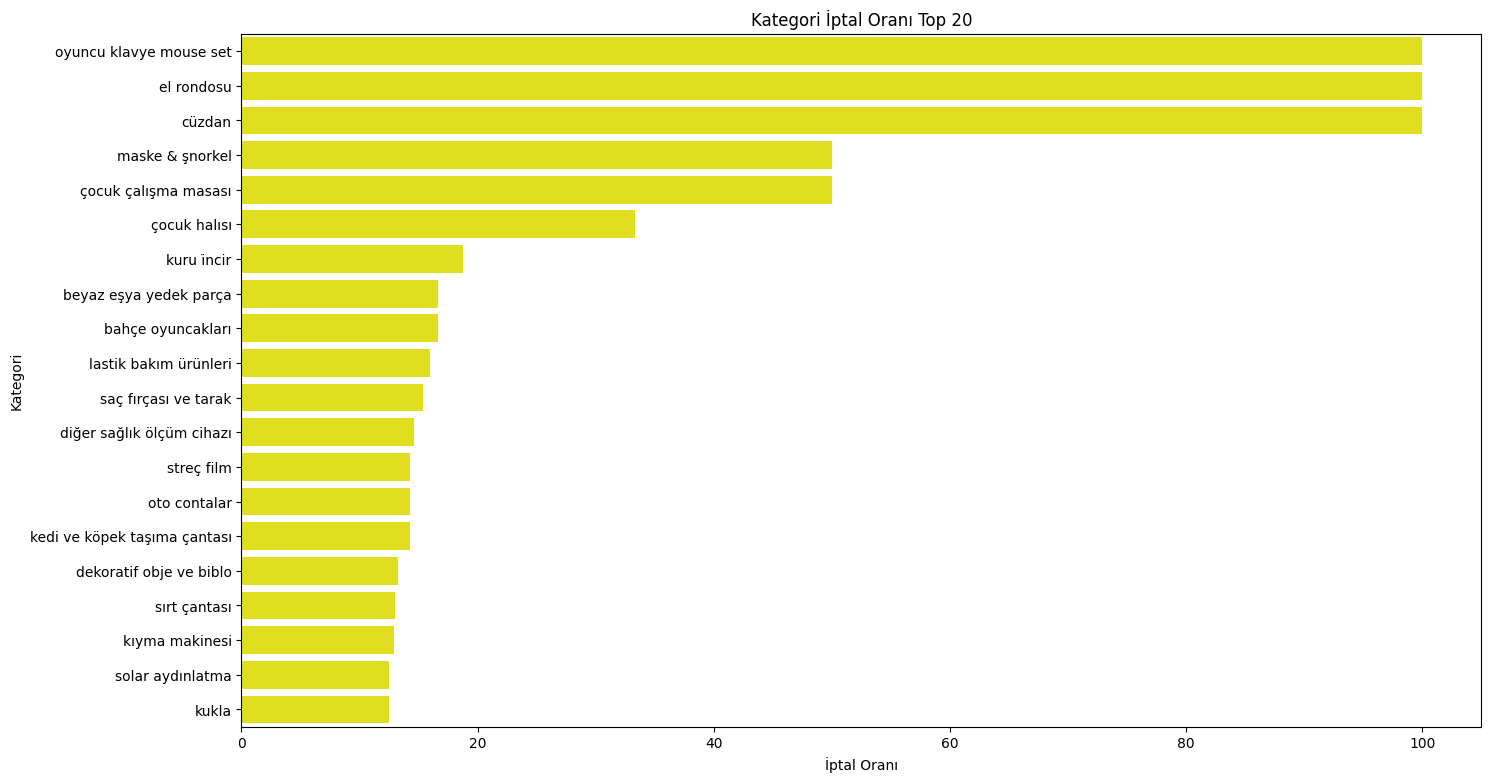

In [61]:
fig, ax = plt.subplots(figsize=(16,9), dpi=100)
sns.barplot(y=df_category_cancel_year_var["kategori"].head(20), x=df_category_cancel_year_var["i̇ptal oranı"].head(20), color="yellow");
# ax.set_xticks(np.arange(0, 101, 5))
plt.xlabel("İptal Oranı")
plt.ylabel("Kategori")
plt.title("Kategori İptal Oranı Top 20");

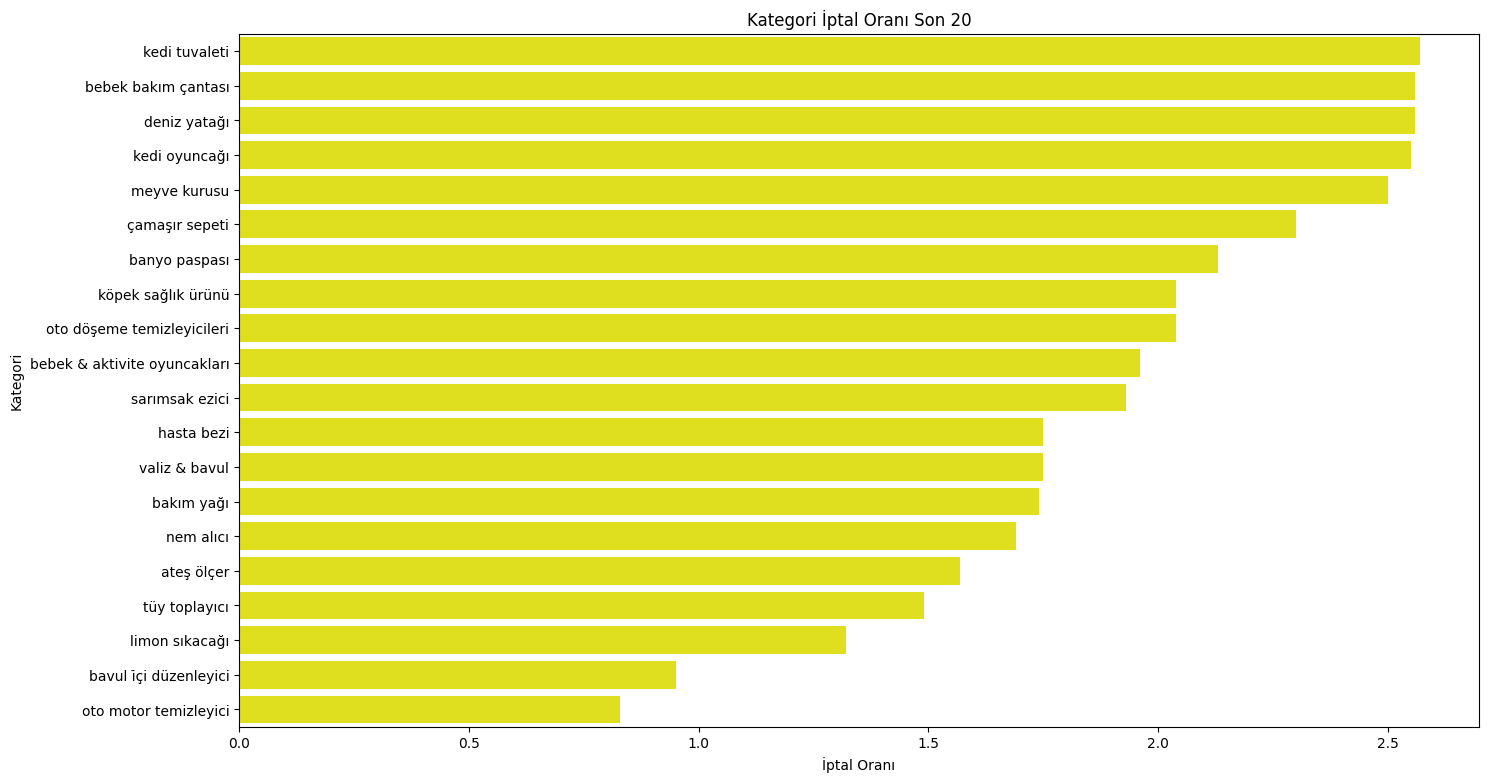

In [62]:
fig, ax = plt.subplots(figsize=(16,9), dpi=100)
sns.barplot(y=df_category_cancel_year_var["kategori"].tail(20), x=df_category_cancel_year_var["i̇ptal oranı"].tail(20), color="yellow");
# ax.set_xticks(np.arange(0, 101, 5))
plt.xlabel("İptal Oranı")
plt.ylabel("Kategori")
plt.title("Kategori İptal Oranı Son 20");

In [63]:
df_category_return_year = pd.read_excel(r"C:\Users\user\Desktop\Data Analysis\Adoba\Sales_Report\Data\Trendyol\Year\Kategori\seller-356254-kategori-bazlı-iade-raporu-2024.07.02-13.57.15.xlsx")
df_category_return_year

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:241: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Kategori,Brüt Ciro,Tahmini Satış Kaybı,Brüt Satış Adedi,İade Adedi,İade Oranı,Modelini Beğenmedim,Kusurlu Ürün Gönderildi,Yanlış Ürün Gönderildi,Vazgeçtim,Diğer,Bedeni/Ebatı Küçük Geldi,Bedeni/Ebatı Büyük Geldi,Ürün ile Görsel & İçerik Bilgisi Uyuşmuyor,Yanlış Sipariş Verdim,Kalitesini Beğenmedim,Teslim Edilemeyen Gönderi
0,Kedi ve Köpek Mama Su Kabı,3428004,169344.30,17609,749,4.25,0,273,30,42,255,68,10,0,26,0,45
1,Türk Kahvesi Makinesi,3315973,438093.19,5262,700,13.30,0,352,7,44,242,9,3,0,20,0,23
2,Tost Makinesi,2763155,234427.64,5608,449,8.01,0,188,6,35,152,15,18,0,10,0,25
3,Saklama Kabı,1564090,150548.96,3665,327,8.92,0,152,8,25,87,20,18,0,6,0,11
4,Çay Makinesi,1770599,102652.53,3820,231,6.05,0,105,8,14,78,1,7,0,7,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,Kedi Tasması,4753,150.00,32,1,3.13,0,0,0,0,1,0,0,0,0,0,0
128,Kişisel Blender,18515,313.27,49,1,2.04,0,1,0,0,0,0,0,0,0,0,0
129,Meyve Kurusu,10665,296.99,120,1,0.83,0,1,0,0,0,0,0,0,0,0,0
130,Eğitici Oyuncaklar,12719,190.00,99,1,1.01,0,0,0,0,1,0,0,0,0,0,0


In [64]:
# df_category_return_year.isnull()

In [65]:
df_category_return_year.columns = [x.lower() for x in df_category_return_year.columns]
df_category_return_year

,kategori,brüt ciro,tahmini satış kaybı,brüt satış adedi,i̇ade adedi,i̇ade oranı,modelini beğenmedim,kusurlu ürün gönderildi,yanlış ürün gönderildi,vazgeçtim,diğer,bedeni/ebatı küçük geldi,bedeni/ebatı büyük geldi,ürün ile görsel & i̇çerik bilgisi uyuşmuyor,yanlış sipariş verdim,kalitesini beğenmedim,teslim edilemeyen gönderi
0,Kedi ve Köpek Mama Su Kabı,3428004,169344.30,17609,749,4.25,0,273,30,42,255,68,10,0,26,0,45
1,Türk Kahvesi Makinesi,3315973,438093.19,5262,700,13.30,0,352,7,44,242,9,3,0,20,0,23
2,Tost Makinesi,2763155,234427.64,5608,449,8.01,0,188,6,35,152,15,18,0,10,0,25
3,Saklama Kabı,1564090,150548.96,3665,327,8.92,0,152,8,25,87,20,18,0,6,0,11
4,Çay Makinesi,1770599,102652.53,3820,231,6.05,0,105,8,14,78,1,7,0,7,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,Kedi Tasması,4753,150.00,32,1,3.13,0,0,0,0,1,0,0,0,0,0,0
128,Kişisel Blender,18515,313.27,49,1,2.04,0,1,0,0,0,0,0,0,0,0,0
129,Meyve Kurusu,10665,296.99,120,1,0.83,0,1,0,0,0,0,0,0,0,0,0
130,Eğitici Oyuncaklar,12719,190.00,99,1,1.01,0,0,0,0,1,0,0,0,0,0,0


In [66]:
df_category_return_year = df_category_return_year.dropna()

In [67]:
object_columns = df_category_return_year.select_dtypes(include='object')
object_columns

,kategori
0,Kedi ve Köpek Mama Su Kabı
1,Türk Kahvesi Makinesi
2,Tost Makinesi
3,Saklama Kabı
4,Çay Makinesi
...,...
127,Kedi Tasması
128,Kişisel Blender
129,Meyve Kurusu
130,Eğitici Oyuncaklar


In [68]:
df_category_return_year[object_columns.columns] = object_columns.apply(lambda x: x.str.lower())
df_category_return_year

,kategori,brüt ciro,tahmini satış kaybı,brüt satış adedi,i̇ade adedi,i̇ade oranı,modelini beğenmedim,kusurlu ürün gönderildi,yanlış ürün gönderildi,vazgeçtim,diğer,bedeni/ebatı küçük geldi,bedeni/ebatı büyük geldi,ürün ile görsel & i̇çerik bilgisi uyuşmuyor,yanlış sipariş verdim,kalitesini beğenmedim,teslim edilemeyen gönderi
0,kedi ve köpek mama su kabı,3428004,169344.30,17609,749,4.25,0,273,30,42,255,68,10,0,26,0,45
1,türk kahvesi makinesi,3315973,438093.19,5262,700,13.30,0,352,7,44,242,9,3,0,20,0,23
2,tost makinesi,2763155,234427.64,5608,449,8.01,0,188,6,35,152,15,18,0,10,0,25
3,saklama kabı,1564090,150548.96,3665,327,8.92,0,152,8,25,87,20,18,0,6,0,11
4,çay makinesi,1770599,102652.53,3820,231,6.05,0,105,8,14,78,1,7,0,7,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,kedi tasması,4753,150.00,32,1,3.13,0,0,0,0,1,0,0,0,0,0,0
128,kişisel blender,18515,313.27,49,1,2.04,0,1,0,0,0,0,0,0,0,0,0
129,meyve kurusu,10665,296.99,120,1,0.83,0,1,0,0,0,0,0,0,0,0,0
130,eğitici oyuncaklar,12719,190.00,99,1,1.01,0,0,0,0,1,0,0,0,0,0,0


In [69]:
df_category_return_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 17 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   kategori                                     132 non-null    object 
 1   brüt ciro                                    132 non-null    int64  
 2   tahmini satış kaybı                          132 non-null    float64
 3   brüt satış adedi                             132 non-null    int64  
 4   i̇ade adedi                                  132 non-null    int64  
 5   i̇ade oranı                                  132 non-null    float64
 6   modelini beğenmedim                          132 non-null    int64  
 7   kusurlu ürün gönderildi                      132 non-null    int64  
 8   yanlış ürün gönderildi                       132 non-null    int64  
 9   vazgeçtim                                    132 non-null    int64  
 10  di

In [70]:
# df_category_return_year["iade_toplam"] = df_category_return_year["modelini beğenmedim"] + df_category_return_year["kusurlu ürün gönderildi"] + df_category_return_year["yanlış ürün gönderildi"] + \
# df_category_return_year["vazgeçtim"] + df_category_return_year["diğer"] + df_category_return_year["bedeni/ebatı küçük geldi"] + df_category_return_year["ürün ile görsel & i̇çerik bilgisi uyuşmuyor"] + \
# df_category_return_year["yanlış sipariş verdim"] + df_category_return_year["kalitesini beğenmedim"] + df_category_return_year["teslim edilemeyen gönderi"]
# df_category_return_year

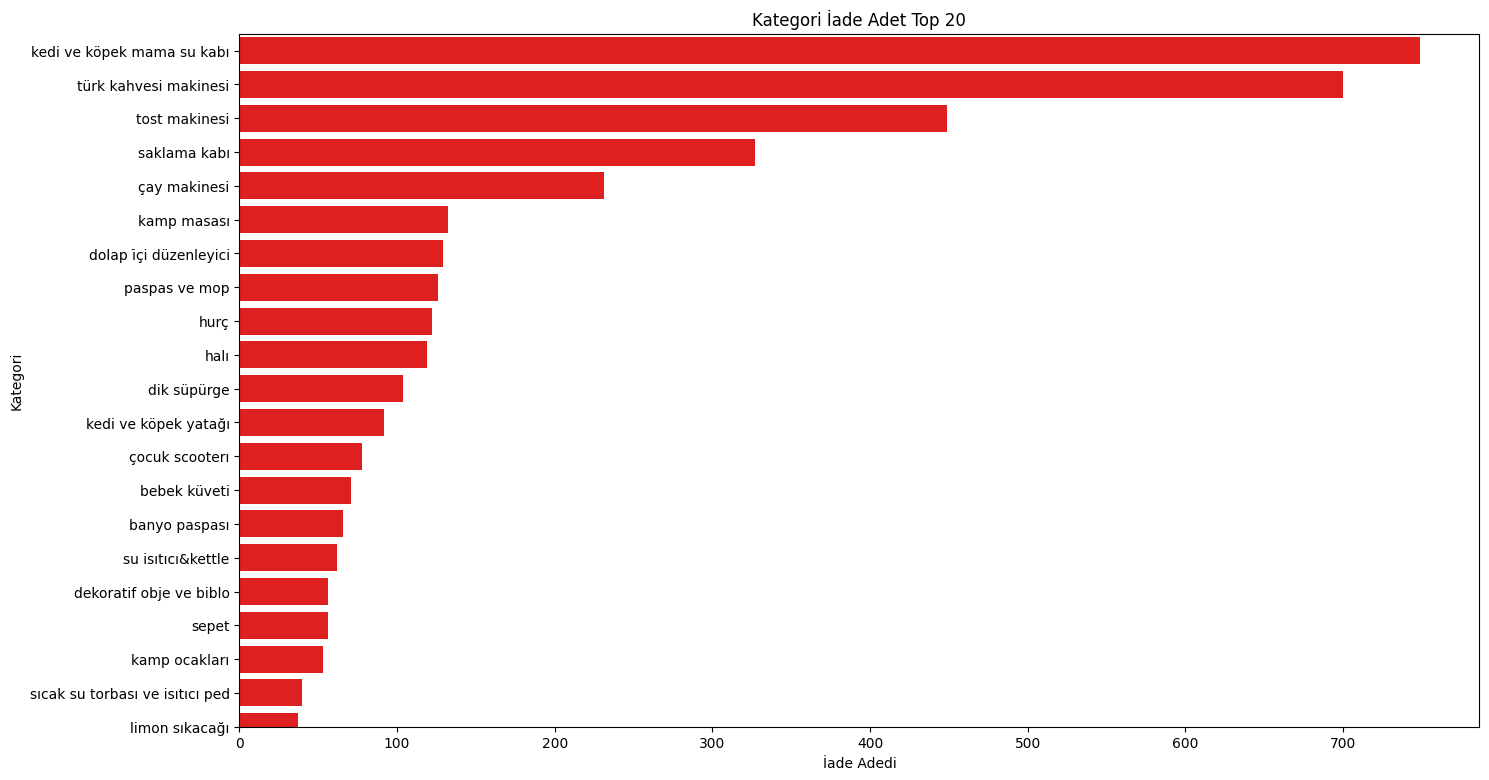

In [71]:
fig, ax = plt.subplots(figsize=(16,9), dpi=100)
sns.barplot(y=df_category_return_year["kategori"], x=df_category_return_year["i̇ade adedi"], color="red", \
            order=df_category_return_year.sort_values("i̇ade adedi", ascending=False)["kategori"])
# ax.set_xticks(np.arange(0, 101, 5))
plt.xlabel("İade Adedi")
plt.ylabel("Kategori")
plt.ylim(20)
plt.title("Kategori İade Adet Top 20");

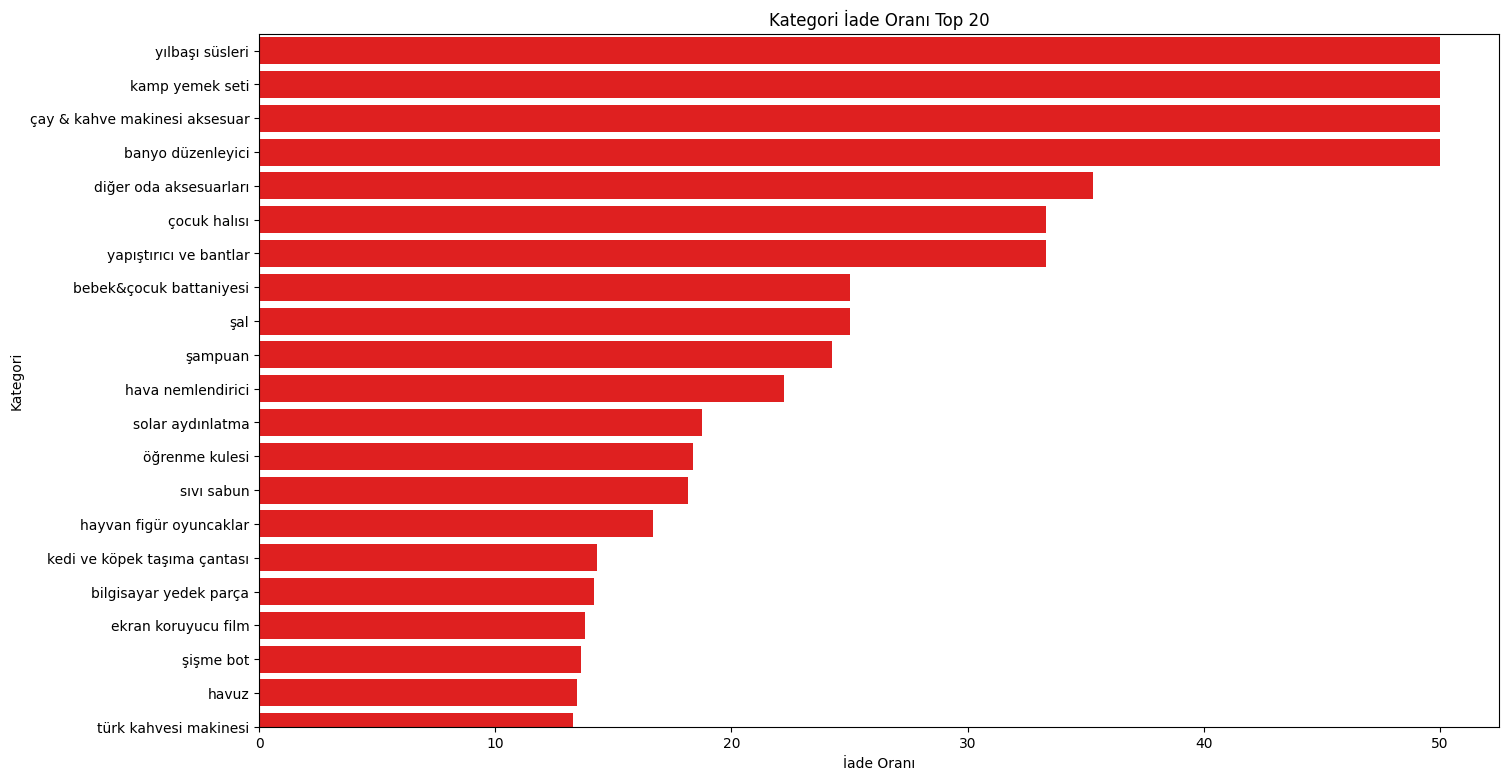

In [72]:
fig, ax = plt.subplots(figsize=(16,9), dpi=100)
sns.barplot(y=df_category_return_year["kategori"], x=df_category_return_year["i̇ade oranı"], color="red", \
            order=df_category_return_year.sort_values("i̇ade oranı", ascending=False)["kategori"])
# ax.set_xticks(np.arange(0, 101, 5))
plt.xlabel("İade Oranı")
plt.ylabel("Kategori")
plt.ylim(20)
plt.title("Kategori İade Oranı Top 20");

In [73]:
df_category_return_year_var = df_category_return_year[['modelini beğenmedim',
       'kusurlu ürün gönderildi', 'yanlış ürün gönderildi', 'vazgeçtim',
       'diğer', 'bedeni/ebatı küçük geldi', 'bedeni/ebatı büyük geldi',
       'ürün ile görsel & i̇çerik bilgisi uyuşmuyor', 'yanlış sipariş verdim',
       'kalitesini beğenmedim', 'teslim edilemeyen gönderi']]
df_category_return_year_var

,modelini beğenmedim,kusurlu ürün gönderildi,yanlış ürün gönderildi,vazgeçtim,diğer,bedeni/ebatı küçük geldi,bedeni/ebatı büyük geldi,ürün ile görsel & i̇çerik bilgisi uyuşmuyor,yanlış sipariş verdim,kalitesini beğenmedim,teslim edilemeyen gönderi
0,0,273,30,42,255,68,10,0,26,0,45
1,0,352,7,44,242,9,3,0,20,0,23
2,0,188,6,35,152,15,18,0,10,0,25
3,0,152,8,25,87,20,18,0,6,0,11
4,0,105,8,14,78,1,7,0,7,0,11
...,...,...,...,...,...,...,...,...,...,...,...
127,0,0,0,0,1,0,0,0,0,0,0
128,0,1,0,0,0,0,0,0,0,0,0
129,0,1,0,0,0,0,0,0,0,0,0
130,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
df_category_return_year_var2 = pd.DataFrame(df_category_return_year_var.sum()).reset_index()
df_category_return_year_var2.rename(columns={"index":"İade Nedeni",0:"Toplam"}, inplace=True)
df_category_return_year_var2

In [ ]:
fig, ax = plt.subplots(figsize=(16,9), dpi=100)
sns.barplot(y=df_category_return_year_var2["İade Nedeni"], x=df_category_return_year_var2["Toplam"], color="pink", \
            order=df_category_return_year_var2.sort_values("Toplam", ascending=False)["İade Nedeni"]);
# ax.set_xticks(np.arange(0, 101, 5))
plt.xlabel("İade Adeti")
plt.ylabel("İade Nedeni")
# plt.ylim(20)
plt.title("Kategori İade Nedeni Toplam");

##### Brand

In [ ]:
df_brand_seller_year = pd.read_excel(r"C:\Users\user\Desktop\Data Analysis\Adoba\Sales_Report\Data\Trendyol\Year\Marka\seller-356254-marka-bazlı-satış-raporu-2024.07.02-13.51.48.xlsx")
df_brand_seller_year

In [ ]:
# df_brand_seller_year.isnull()

In [ ]:
df_brand_seller_year.columns = [x.lower() for x in df_brand_seller_year.columns]
df_brand_seller_year

In [ ]:
df_brand_seller_year = df_brand_seller_year.dropna()

In [ ]:
object_columns = df_brand_seller_year.select_dtypes(include='object')
object_columns

In [ ]:
df_brand_seller_year[object_columns.columns] = object_columns.apply(lambda x: x.str.lower())
df_brand_seller_year

In [ ]:
df_brand_seller_year.sort_values(by="net satış adedi", ascending=False)

In [ ]:
df_brand_seller_year.sort_values("net satış adedi", ascending=False)[['marka','net satış adedi']].reset_index(drop=True).head(20)

In [ ]:
fig, ax = plt.subplots(figsize=(16,9), dpi=100)
sns.barplot(y=df_brand_seller_year["marka"], x=df_brand_seller_year["net satış adedi"], color="red", order=df_brand_seller_year.sort_values("net satış adedi", ascending=False)['marka']);
# ax.set_xticks(np.arange(0, 101, 5))
plt.xlabel("Net Satış")
plt.ylabel("Marka")
plt.title("Marka Net Satış Top 20")
plt.ylim(20);

In [ ]:
df_brand_cancel_year = pd.read_excel(r"C:\Users\user\Desktop\Data Analysis\Adoba\Sales_Report\Data\Trendyol\Year\Marka\seller-356254-marka-bazlı-iptal-raporu-2024.07.02-13.53.15.xlsx")
df_brand_cancel_year

In [ ]:
# df_brand_cancel_year.isnull()

In [ ]:
df_brand_cancel_year.columns = [x.lower() for x in df_brand_cancel_year.columns]
df_brand_cancel_year

In [ ]:
df_brand_cancel_year = df_brand_cancel_year.dropna()

In [ ]:
object_columns = df_brand_cancel_year.select_dtypes(include='object')
object_columns

In [ ]:
df_brand_cancel_year[object_columns.columns] = object_columns.apply(lambda x: x.str.lower())
df_brand_cancel_year

In [ ]:
fig, ax = plt.subplots(figsize=(16,9), dpi=100)
sns.barplot(y=df_brand_cancel_year["marka"], x=df_brand_cancel_year["i̇ptal oranı"], color="red", order=df_brand_cancel_year.sort_values("i̇ptal oranı", ascending=False)['marka']);
# ax.set_xticks(np.arange(0, 101, 5))
plt.xlabel("İptal Oranı")
plt.ylabel("Marka")
plt.title("Marka İptal Oranı Top 20")
plt.ylim(20);

In [ ]:
df_brand_cancel_year_var = df_brand_cancel_year.sort_values("i̇ptal oranı", ascending=False)[['marka','i̇ptal oranı']].tail(20)
df_brand_cancel_year_var.reset_index(drop=True, inplace=True)
df_brand_cancel_year_var

In [ ]:
fig, ax = plt.subplots(figsize=(16,9), dpi=100)
sns.barplot(y=df_brand_cancel_year_var["marka"], x=df_brand_cancel_year_var["i̇ptal oranı"], color="red", order=df_brand_cancel_year_var.sort_values("i̇ptal oranı", ascending=False)['marka'])
# ax.set_xticks(np.arange(0, 101, 5))
plt.xlabel("İptal Oranı")
plt.ylabel("Marka")
plt.title("Marka İptal Oranı Son 20");
# plt.ylim(20);

In [ ]:
df_brand_return_year = pd.read_excel(r"C:\Users\user\Desktop\Data Analysis\Adoba\Sales_Report\Data\Trendyol\Year\Marka\seller-356254-marka-bazlı-iade-raporu-2024.07.02-13.53.46.xlsx")
df_brand_return_year

In [ ]:
# df_brand_return_year.isnull()

In [ ]:
df_brand_return_year.columns = [x.lower() for x in df_brand_return_year.columns]
df_brand_return_year

In [ ]:
df_brand_return_year = df_brand_return_year.dropna()

In [ ]:
object_columns = df_brand_return_year.select_dtypes(include='object')
object_columns

In [ ]:
df_brand_return_year[object_columns.columns] = object_columns.apply(lambda x: x.str.lower())
df_brand_return_year

In [ ]:
fig, ax = plt.subplots(figsize=(16,9), dpi=100)
sns.barplot(y=df_brand_return_year["marka"], x=df_brand_return_year["i̇ade oranı"], color="red", \
            order=df_brand_return_year.sort_values("i̇ade oranı", ascending=False)["marka"]);
# ax.set_xticks(np.arange(0, 101, 5))
plt.xlabel("İade Oranı")
plt.ylabel("Marka")
plt.ylim(20)
plt.title("Marka İade Oranı Top 20");

In [ ]:
df_brand_return_year.columns

In [ ]:
df_brand_return_year_var = df_brand_return_year[['modelini beğenmedim',
       'kusurlu ürün gönderildi', 'yanlış ürün gönderildi', 'vazgeçtim',
       'diğer', 'bedeni/ebatı küçük geldi', 'bedeni/ebatı büyük geldi',
       'ürün ile görsel & i̇çerik bilgisi uyuşmuyor', 'yanlış sipariş verdim',
       'kalitesini beğenmedim', 'teslim edilemeyen gönderi']]
df_brand_return_year_var

In [ ]:
df_brand_return_year_var2 = pd.DataFrame(df_brand_return_year_var.sum()).reset_index()
df_brand_return_year_var2.rename(columns={"index":"İade Nedeni",0:"Toplam"}, inplace=True)
df_brand_return_year_var2

In [ ]:
fig, ax = plt.subplots(figsize=(16,9), dpi=100)
sns.barplot(y=df_brand_return_year_var2["İade Nedeni"], x=df_brand_return_year_var2["Toplam"], color="pink", \
            order=df_brand_return_year_var2.sort_values("Toplam", ascending=False)["İade Nedeni"]);
# ax.set_xticks(np.arange(0, 101, 5))
plt.xlabel("İade Adeti")
plt.ylabel("İade Nedeni")
# plt.ylim(20)
plt.title("Marka İade Nedeni Toplam");

##### Barcode

In [ ]:
df_barkod_seller_year = pd.read_excel(r"C:\Users\user\Desktop\Data Analysis\Adoba\Sales_Report\Data\Trendyol\Year\Ürün Barkod\seller-356254-ürün-bazlı-satış-raporu-2024.07.02-13.46.51.xlsx")
df_barkod_seller_year

In [ ]:
# df_barkod_seller_year.isnull()

In [ ]:
df_barkod_seller_year.columns = [x.lower() for x in df_barkod_seller_year.columns]
df_barkod_seller_year

In [ ]:
df_barkod_seller_year = df_barkod_seller_year.dropna()

In [ ]:
object_columns = df_barkod_seller_year.select_dtypes(include='object')
object_columns

In [ ]:
object_columns = object_columns.drop("model kodu", axis=1)
object_columns

In [ ]:
df_barkod_seller_year.loc[:,object_columns.columns] = object_columns.apply(lambda x: x.str.lower())
df_barkod_seller_year

In [ ]:
# df_barkod_seller_year[object_columns.columns] = object_columns.apply(lambda x: x.str.lower())
# df_barkod_seller_year

In [ ]:
df_barkod_seller_year[df_barkod_seller_year["model kodu"].duplicated()]

In [ ]:
df_barkod_seller_year_var = df_barkod_seller_year.groupby(["model kodu"])[["net satış adedi"]].sum().reset_index()
df_barkod_seller_year_var

In [ ]:
fig, ax = plt.subplots(figsize=(16,9), dpi=100)
sns.barplot(y=df_barkod_seller_year_var["model kodu"], x=df_barkod_seller_year_var["net satış adedi"], color="green", order=df_barkod_seller_year_var.sort_values("net satış adedi", ascending=False)['model kodu'])
# ax.set_xticks(np.arange(0, 101, 5))
plt.xlabel("Net Satış")
plt.ylabel("Model Kodu")
plt.title("Model Kod Net Satış Top 20")
plt.ylim(20);

In [ ]:
df_barkod_seller_year_var2 = df_barkod_seller_year_var.sort_values("net satış adedi").head(20)
df_barkod_seller_year_var2.reset_index(drop=True, inplace=True)
df_barkod_seller_year_var2

In [ ]:
fig, ax = plt.subplots(figsize=(16,9), dpi=100)
sns.barplot(y=df_barkod_seller_year_var2["model kodu"], x=df_barkod_seller_year_var2["net satış adedi"], color="green", order=df_barkod_seller_year_var2.sort_values("net satış adedi", ascending=False)['model kodu'])
# ax.set_xticks(np.arange(0, 101, 5))
plt.xlabel("Net Satış")
plt.ylabel("Model Kodu")
plt.title("Model Kod Net Satış Son 20");

In [ ]:
df_barkod_cancel_year = pd.read_excel(r"C:\Users\user\Desktop\Data Analysis\Adoba\Sales_Report\Data\Trendyol\Year\Ürün Barkod\seller-356254-barkod-bazlı-iptal-raporu-2024.07.02-13.47.28.xlsx")
df_barkod_cancel_year

In [ ]:
# df_barkod_cancel_year.isnull()

In [ ]:
df_barkod_cancel_year.columns = [x.lower() for x in df_barkod_cancel_year.columns]
df_barkod_cancel_year

In [ ]:
df_barkod_cancel_year = df_barkod_cancel_year.dropna()

In [ ]:
object_columns = df_barkod_cancel_year.select_dtypes(include='object')
object_columns

In [ ]:
object_columns = object_columns.drop("model kodu", axis=1)
object_columns

In [ ]:
df_barkod_cancel_year.loc[:,object_columns.columns] = object_columns.apply(lambda x: x.str.lower())
df_barkod_cancel_year

In [ ]:
# df_barkod_cancel_year[object_columns.columns] = object_columns.apply(lambda x: x.str.lower())
# df_barkod_cancel_year

In [ ]:
df_barkod_cancel_year_var = df_barkod_cancel_year.groupby(["model kodu"])[["i̇ptal oranı"]].sum().reset_index()
df_barkod_cancel_year_var

In [ ]:
fig, ax = plt.subplots(figsize=(16,9), dpi=100)
sns.barplot(y=df_barkod_cancel_year_var["model kodu"], x=df_barkod_cancel_year_var["i̇ptal oranı"], color="orange", order=df_barkod_cancel_year_var.sort_values("i̇ptal oranı", ascending=False)['model kodu']);
# ax.set_xticks(np.arange(0, 101, 5))
plt.xlabel("İptal Oranı")
plt.ylabel("Model Kodu")
plt.title("Model Kod İptal Oranı Top 20")
plt.ylim(20);

In [ ]:
df_brand_cancel_year_var2 = df_brand_cancel_year_var.sort_values("i̇ptal oranı", ascending=False)[['marka','i̇ptal oranı']].tail(20)
df_brand_cancel_year_var2.reset_index(drop=True, inplace=True)
df_brand_cancel_year_var2

In [ ]:
fig, ax = plt.subplots(figsize=(16,9), dpi=100)
sns.barplot(y=df_brand_cancel_year_var2["marka"], x=df_brand_cancel_year_var2["i̇ptal oranı"], color="red", order=df_brand_cancel_year_var2.sort_values("i̇ptal oranı", ascending=False)['marka'])
# ax.set_xticks(np.arange(0, 101, 5))
plt.xlabel("İptal Oranı")
plt.ylabel("Marka")
plt.title("Marka İptal Oranı Son 20");
# plt.ylim(20);

In [ ]:
df_barkod_return_year = pd.read_excel(r"C:\Users\user\Desktop\Data Analysis\Adoba\Sales_Report\Data\Trendyol\Year\Ürün Barkod\seller-356254-barkod-bazlı-iade-raporu-2024.07.02-13.48.00.xlsx")
df_barkod_return_year

In [ ]:
# df_barkod_return_year.isnull()

In [ ]:
df_barkod_return_year.columns = [x.lower() for x in df_barkod_return_year.columns]
df_barkod_return_year

In [ ]:
df_barkod_return_year = df_barkod_return_year.dropna()

In [ ]:
object_columns = df_barkod_return_year.select_dtypes(include='object')
object_columns

In [ ]:
# object_columns = object_columns.apply(lambda x: x.str.strip('''"'''))
# object_columns

In [ ]:
df_barkod_return_year.loc[:,["barkod","ürün adı","kategori","marka","renk","beden","model kodu"]] = df_barkod_return_year.loc[:,["barkod","ürün adı","kategori","marka","renk","beden","model kodu"]].apply(lambda x: x.str.strip('''"'''))
df_barkod_return_year

In [ ]:
# df_barkod_return_year[["barkod","ürün adı","kategori","marka","renk","beden","model kodu"]] = df_barkod_return_year[["barkod","ürün adı","kategori","marka","renk","beden","model kodu"]].apply(lambda x: x.str.strip('''"'''))
# df_barkod_return_year

In [ ]:
df_barkod_return_year.loc[:,["ürün adı","kategori","marka","renk","beden"]] = df_barkod_return_year.loc[:,["ürün adı","kategori","marka","renk","beden"]].apply(lambda x: x.str.lower())
df_barkod_return_year

In [ ]:
df_barkod_return_year.columns

In [ ]:
df_barkod_return_year_var = df_barkod_return_year.groupby(["model kodu"])[["i̇ade oranı"]].sum().reset_index()
df_barkod_return_year_var

In [ ]:
fig, ax = plt.subplots(figsize=(16,9), dpi=100)
sns.barplot(y=df_barkod_return_year_var["model kodu"], x=df_barkod_return_year_var["i̇ade oranı"], color="red", \
            order=df_barkod_return_year_var.sort_values("i̇ade oranı", ascending=False)["model kodu"]);
# ax.set_xticks(np.arange(0, 101, 5))
plt.xlabel("İade Oranı")
plt.ylabel("Marka")
plt.ylim(20)
plt.title("Model Kodu İade Oranı Top 20");

In [ ]:
df_barkod_return_year_var2 = df_barkod_return_year[['modelini beğenmedim',
       'kusurlu ürün gönderildi', 'yanlış ürün gönderildi', 'vazgeçtim',
       'diğer', 'bedeni/ebatı küçük geldi', 'bedeni/ebatı büyük geldi',
       'ürün ile görsel & i̇çerik bilgisi uyuşmuyor', 'yanlış sipariş verdim',
       'kalitesini beğenmedim', 'teslim edilemeyen gönderi']]
df_barkod_return_year_var2

In [ ]:
df_barkod_return_year_var3 = pd.DataFrame(df_barkod_return_year_var2.sum()).reset_index()
df_barkod_return_year_var3.rename(columns={"index":"İade Nedeni",0:"Toplam"}, inplace=True)
df_barkod_return_year_var3

In [ ]:
fig, ax = plt.subplots(figsize=(16,9), dpi=100)
sns.barplot(y=df_barkod_return_year_var3["İade Nedeni"], x=df_barkod_return_year_var3["Toplam"], color="pink", \
            order=df_barkod_return_year_var3.sort_values("Toplam", ascending=False)["İade Nedeni"]);
# ax.set_xticks(np.arange(0, 101, 5))
plt.xlabel("İade Adeti")
plt.ylabel("İade Nedeni")
# plt.ylim(20)
plt.title("Model Kodu İade Nedeni Toplam");

##### Evaluation

In [ ]:
df_product_evaluation = pd.read_excel(r"C:\Users\user\Desktop\Data Analysis\Adoba\Sales_Report\Data\Trendyol\Ranking\seller-356254-urun-degerlendirmeleri-özet-2024.07.02-14.44.02.xlsx")
df_product_evaluation

In [ ]:
df_product_evaluation.info()

In [ ]:
df_product_evaluation.columns = [x.lower() for x in df_product_evaluation.columns]
df_product_evaluation

In [ ]:
df_product_evaluation.dropna()

In [ ]:
object_columns = df_product_evaluation.select_dtypes(include='object')
object_columns

In [ ]:
df_product_evaluation[object_columns.columns] = object_columns.apply(lambda x: x.str.lower())
df_product_evaluation

In [ ]:
df_product_evaluation["oy adedi"].max()

In [ ]:
df_product_evaluation["oy adedi"].min()

In [ ]:
df_product_evaluation["oy oranlama"] = (df_product_evaluation["oy adedi"]/df_product_evaluation["oy adedi"].max())*5*df_product_evaluation["ortalama ürün puanı"]
df_product_evaluation["oy oranlama"] = df_product_evaluation["oy oranlama"].astype(float).round(decimals=2)
df_product_evaluation

In [ ]:
df_product_evaluation.columns

In [ ]:
# df_product_evaluation.groupby(["ürün adı"])[["oy oranlama"]].sum().reset_index()

In [ ]:
df_product_evaluation_var = df_product_evaluation.groupby(["ürün adı"])[["oy oranlama"]].sum().reset_index()
df_product_evaluation_var = df_product_evaluation_var.sort_values("oy oranlama", ascending=False).head(20)
df_product_evaluation_var.reset_index(drop=True, inplace=True)
df_product_evaluation_var

In [ ]:
df_product_evaluation_var2 = df_product_evaluation.groupby(["kategori"])[["oy oranlama"]].sum().reset_index()
df_product_evaluation_var2 = df_product_evaluation_var2.sort_values("oy oranlama", ascending=False).head(20)
df_product_evaluation_var2.reset_index(drop=True, inplace=True)
df_product_evaluation_var2

In [ ]:
df_product_evaluation_var3 = df_product_evaluation.groupby(["marka"])[["oy oranlama"]].sum().reset_index()
df_product_evaluation_var3 = df_product_evaluation_var3.sort_values("oy oranlama", ascending=False).head(20)
df_product_evaluation_var3.reset_index(drop=True, inplace=True)
df_product_evaluation_var3

In [ ]:
df_product_evaluation_var4 = df_product_evaluation.groupby(["model kodu"])[["oy oranlama"]].sum().reset_index()
df_product_evaluation_var4 = df_product_evaluation_var4.sort_values("oy oranlama", ascending=False).head(20)
df_product_evaluation_var4.reset_index(drop=True, inplace=True)
df_product_evaluation_var4

In [ ]:
fig, ax = plt.subplots(figsize=(16,9), dpi=100)
graph = sns.barplot(y=df_product_evaluation_var["ürün adı"], x=df_product_evaluation_var["oy oranlama"], color="yellow")
# ax.set_xticks(np.arange(0, 101, 5))
plt.xlabel("Değerlendirme")
plt.ylabel("Ürün Adı")
plt.title("Ürün Değerlendirme Top 20")
graph.bar_label(ax.containers[0]);

In [ ]:
# fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(6,10),dpi=200)
# axes[0][0].plot(x,y)
# axes[0][0].set_xlabel("X_LABEL 1,0")
# axes[0][1].plot(x,y)
# axes[0][1].set_xlim(2,6)
# axes[1][0].plot(x,y)
# axes[1][0].set_ylabel("Y_LABEL 1,0")
# axes[1][1].plot(a,b)
# axes[1][1].set_title('TITLE')
# fig.suptitle("Figure Level",fontsize=16)
# plt.tight_layout()
# fig.set_figwidth(10)
# fig.savefig('new_subplots.png',bbox_inches='tight')

In [ ]:
df_product_evaluation.columns

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 20), dpi=100)
fig.suptitle('Ürün Değerlendirme', size=16)

axes[0].set(xlabel='Oy Oranlama',ylabel='Kategori', title='Kategori Oranlama')
sns.boxplot(ax=axes[0], data=df_product_evaluation_var2, x='oy oranlama', y='kategori', color="red")

axes[1].set(xlabel='Oy Oranlama',ylabel='Marka', title='Marka Oranlama')
sns.boxplot(ax=axes[1], data=df_product_evaluation_var3, x='oy oranlama', y='marka', color="blue")

axes[2].set(xlabel='Oy Oranlama',ylabel='Model Kodu', title='Model Kodu Oranlama')
sns.boxplot(ax=axes[2], data=df_product_evaluation_var4, x='oy oranlama', y='model kodu', color="orange")

plt.tight_layout(pad=2, h_pad=2)
#fig.set_figwidth(10)



In [ ]:
df_seller_evaluation = pd.read_excel(r"C:\Users\user\Desktop\Data Analysis\Adoba\Sales_Report\Data\Trendyol\Ranking\seller-356254-satıcı-değerlendirmeleri-2024.07.02-14.45.06.xlsx")
df_seller_evaluation

In [ ]:
df_seller_evaluation.info()

In [ ]:
df_seller_evaluation.columns = [x.lower() for x in df_seller_evaluation.columns]
df_seller_evaluation

In [ ]:
object_columns = df_seller_evaluation.select_dtypes(include='object')
object_columns

In [ ]:
df_seller_evaluation[object_columns.columns] = object_columns.apply(lambda x: x.str.lower())
df_seller_evaluation

In [ ]:
df_seller_evaluation_var = df_seller_evaluation.dropna(subset="olumsuz etkiler")
df_seller_evaluation_var.reset_index(drop=True, inplace=True)
df_seller_evaluation_var

In [ ]:
fig, ax = plt.subplots(figsize=(16,9), dpi=100)
graph = sns.countplot(data=df_seller_evaluation, x="olumsuz etkiler", color="brown")
# ax.set_xticks(np.arange(0, 101, 5))
plt.xlabel("Olumsuz Etki")
plt.xticks(rotation=45)
plt.ylabel("Adet")
plt.title("Olumsuz Etkiler")

# for value on graph 1 way
graph.bar_label(ax.containers[0]);

# # for value on graph 2 way
# i=0
# for p in graph.patches:
#     height = p.get_height()
#     graph.text(p.get_x()+p.get_width()/2., height + 0.5,
#         df_seller_evaluation['olumsuz etkiler'].value_counts()[i],ha="center")
#     i += 1;

In [ ]:
df_seller_evaluation_var2 = df_seller_evaluation.dropna(subset=["yorum"])
df_seller_evaluation_var2 

In [ ]:
df_seller_evaluation_var2.loc[:,"yorum"] = df_seller_evaluation_var2.loc[:,"yorum"].apply(lambda text: character_clean_lower_text(text, custom_alp=tr))
df_seller_evaluation_var2

In [ ]:
comments = df_seller_evaluation_var2["yorum"]
comments

In [ ]:
all_comments = " ".join(comments)
# all_comments[:100]

In [ ]:
stop_words = stopwords.words('turkish')

In [ ]:
wordcloud=WordCloud(background_color='white', max_words=100, stopwords=stop_words)

In [ ]:
wordcloud.generate(all_comments)

In [ ]:
plt.figure(figsize = (16,9), dpi=100)
plt.imshow(wordcloud)
plt.axis("off")
plt.show();

In [ ]:
word_tokens = nltk.word_tokenize(all_comments)

In [ ]:
df_word_series = pd.Series(word_tokens)

In [ ]:
df_word_count_series = df_word_series.value_counts().sort_values(ascending=False)
#df_word_count_series

In [ ]:
df_word_count = pd.DataFrame(df_word_count_series).reset_index()
df_word_count = df_word_count.rename(columns={"index": "word", 0 : "frequency"})
df_word_count

In [ ]:
df_favourite_evaluation = pd.read_excel(r"C:\Users\user\Desktop\Data Analysis\Adoba\Sales_Report\Data\Trendyol\Ranking\seller-356254-favori-görüntüleme-raporu-2024.07.02-14.39.58.xlsx")
df_favourite_evaluation

In [ ]:
df_favourite_evaluation.info()

In [ ]:
df_favourite_evaluation.columns = [x.lower() for x in df_favourite_evaluation.columns]
df_favourite_evaluation

In [ ]:
# df_favourite_evaluation.drop(["Ürün Görseli","Aktif Favori Sayısı"], axis=1, inplace=True)
df_favourite_evaluation.drop(["ürün görseli"], axis=1, inplace=True)
df_favourite_evaluation

In [ ]:
object_columns = df_favourite_evaluation.select_dtypes(include='object')
object_columns

In [ ]:
df_favourite_evaluation[object_columns.columns] = object_columns.apply(lambda x: x.str.lower())
df_favourite_evaluation

In [ ]:
df_favourite_evaluation_var = df_favourite_evaluation[df_favourite_evaluation.duplicated(subset=["model kodu"], keep=False)].sort_values(by=["model kodu"])
df_favourite_evaluation_var.reset_index(drop=True, inplace=True)
df_favourite_evaluation_var

In [ ]:
# df_favourite_evaluation_var.to_excel(r"C:\Users\user\Downloads\Temp Duplicated Model.xlsx", index=False)

In [ ]:
df_favourite_evaluation[df_favourite_evaluation["model kodu"] == '002541']  # ???

In [ ]:
df_favourite_evaluation[df_favourite_evaluation["model kodu"] == '7644-31']  # ???

In [ ]:
df_favourite_evaluation.columns

In [ ]:
# Sepete eklenme, satışa dönüş oranı, aktif favori sayısı değerlendirilecek.

df_product_evaluation

In [ ]:
df_seller_evaluation_var

In [ ]:
df_seller_evaluation_var[(df_seller_evaluation_var["olumsuz etkiler"] == "eksik veya hatalı ürün") | \
    (df_seller_evaluation_var["olumsuz etkiler"] == "eksik veya hatalı ürün, özensiz paketleme" ) | \
    (df_seller_evaluation_var["olumsuz etkiler"] == "özensiz paketleme, eksik veya hatalı ürün" )]

#### Tips

##### Analysis

In [ ]:
# df['Quality'] = df[['total_bill','tip']].apply(lambda df : quality(df['total_bill'], df['tip']),axis=1)
# df['Quality'] = np.vectorize(quality)(df['total_bill'],df['tip'])  # much faster

In [ ]:
# df.info(), df,describe(), df.columns, df.index, df.shape, df.shape[0], df.set_index("Payment ID")

# df['tip_percentage'] = 100 * df['tip'] / df['total_bill']

# df['price_per_person'] = np.round(df['total_bill']/df['size'],2)

# df.drop('tip_percentage',axis=1)

In [ ]:
# Merging

# help(pd.merge)

# pd.merge(registrations,logins,how='inner',on='name')

# pd.merge(left=registrations, right=logins,how='right',on='name')

# registrations.columns = ["reg_name","reg_id"]

# pd.merge(registrations,logins,how='inner',left_on="reg_name", right_on="name")

In [ ]:
# Conditional Filter

# df[(df['total_bill']>30) & (df['sex'] == 'Male')]  # and

# df[(df['total_bill']>30) | (df['sex'] == 'Male')]  # or

# options = ['Sat','Sun']
# df[df['day'].isin(options)]

In [ ]:
# Groupby

# df.groupby('model_year').describe()

# df[df['cylinders'].isin([6,8])].groupby(['model_year', 'cylinders']).mean()

# df.sort_index(level='model_year',ascending=False)

# df.agg(['std','mean']), df.agg(['std','mean'])['mpg'], df.agg({'mpg':['max','mean'],'weight':['mean','std']})

In [ ]:
# File

# df = pd.read_excel("my_excel_file.xlsx", sheet_name="First_Sheet")

# df.to_excel('example.xlsx', sheet_name="First_Sheet", index=False)

In [ ]:
# Missing

# df[df['pre_movie_score'].isnull()], df[df['pre_movie_score'].notnull()], df[(df['pre_movie_score'].isnull()) & (df['first_name'].notnull())]

# df.dropna(subset=['last_name']), df.dropna(axis=0)

# df['pre_movie_score'] = df['pre_movie_score'].fillna(0), df['pre_movie_score'].fillna(df['pre_movie_score'].mean())

In [ ]:
# Statistic Sorting

# df['total_bill'].idxmax() # Row location, df['total_bill'].idxmin() # Row location, df.iloc[df['total_bill'].idxmax]

# df.corr(), df['sex'].value_counts(), df['sex'].replace('Female','F'), df['sex'].replace(['Female','Male'],['F','M'])

# mymap = {'Female':'F','Male':'M'}
# df['sex'].map(mymap)

# df.duplicated(), df['total_bill'].between(10,20,inclusive=True), df[df['total_bill'].between(10,20,inclusive=True)]

# sales["DATE"].dt.year, sales["DATE"].dt.month

##### Visualization

In [ ]:
# plt.plot(x,z)
# plt.xlabel('X Axis')
# plt.ylabel("Y Axis")
# plt.xlim(0,6)
# plt.ylim(0,15)
# plt.title("String Title")
# help(plt.savefig)

In [ ]:
# labels = ['UK', 'USA', 'GER', 'JAP', 'FRA']
# men_means = [40, 35, 45, 53, 28]
# fig, ax = plt.subplots(figsize=(8,5))
# ax.bar(labels,men_means, label="Men", width=0.4)
# ax.set_ylabel('Ages')
# ax.set_title("Ages means by Gender")
# ax.set_xticks(x)
# ax.set_xticklabels(labels)
# ax.legend();

In [ ]:
# labels = ['UK', 'USA', 'GER', 'JAP', 'FRA']
# men_means = [40, 35, 45, 53, 28]
# women_means = [35, 32, 48, 48, 31]
# fig, ax = plt.subplots(figsize=(8,5))
# x = np.arange(len(labels))
# width = 0.4
# ax.bar(x - width/2,men_means, width, label="Men")
# ax.bar(x + width/2,women_means, width, label="Women")
# ax.set_ylabel('Ages')
# ax.set_title("Ages means by Gender")
# ax.set_xticks(x)
# ax.set_xticklabels(labels)
# ax.legend();

In [ ]:
# fig = plt.figure()
# # Large Axes
# axes1 = fig.add_axes([0,0,1,1])
# axes1.plot(a,b)
# # Small Axes
# axes2 = fig.add_axes([0.2,0.2,0.5,0.5])
# axes2.plot(x,y)
# plt.show()

In [ ]:
# fig = plt.figure()
# # Large Axes
# axes1 = fig.add_axes([0,0,1,1])
# axes1.plot(a,b)
# axes1.set_xlim(0,8)
# axes1.set_ylim(0,8000)
# axes1.set_xlabel('A')
# axes1.set_ylabel('B')
# axes2.set_title('Nonlinear')
# # Small Axes
# axes2 = fig.add_axes([0.2,0.2,0.5,0.5])
# axes2.plot(x,y)
# axes2.set_xlim(0,8)
# axes2.set_ylim(0,15)
# axes2.set_xlabel('A')
# axes2.set_ylabel('B')
# axes2.set_title('Linear')
# plt.show()

In [ ]:
# fig = plt.figure()
# # Large Axes
# axes1 = fig.add_axes([0,0,1,1])
# axes1.plot(a,b)
# axes1.set_xlim(0,10)
# axes1.set_ylim(0,8000)
# axes1.set_xlabel('A')
# axes1.set_ylabel('B')
# axes2.set_title('Nonlinear')
# # Small Axes
# axes2 = fig.add_axes([0.5,0.5,0.4,0.5])
# axes2.plot(x,y)
# axes2.set_xlim(0,8)
# axes2.set_ylim(0,15)
# axes2.set_xlabel('A')
# axes2.set_ylabel('B')
# axes2.set_title('Linear')
# plt.show()

In [ ]:
# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
# ax.plot(x,x,label='X vs X')
# ax.plot(x,x**2,label="X vs X^2")
# ax.legend(loc=0)

In [ ]:
# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
# ax.plot(x,x,label='X vs X')
# ax.plot(x,x**2,label="X vs X^2")
# ax.legend(loc=(1.1,0.5))

In [ ]:
# fig, axes = plt.subplots(nrows=2,ncols=2)
# axes[0][0].plot(x,y)
# axes[0][1].plot(x,y)
# axes[1][0].plot(x,y)
# axes[1][1].plot(a,b)
# fig.subplots_adjust()  # fig.subplots_adjust(wspace=0.9, hspace=1), plt.tight_layout()

In [ ]:
# fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(6,10),dpi=200)
# axes[0][0].plot(x,y)
# axes[0][0].set_xlabel("X_LABEL 1,0")
# axes[0][1].plot(x,y)
# axes[0][1].set_xlim(2,6)
# axes[1][0].plot(x,y)
# axes[1][0].set_ylabel("Y_LABEL 1,0")
# axes[1][1].plot(a,b)
# axes[1][1].set_title('TITLE')
# fig.suptitle("Figure Level",fontsize=16)
# plt.tight_layout()
# fig.set_figwidth(10)
# fig.savefig('new_subplots.png',bbox_inches='tight')

In [ ]:
# plt.figure(figsize=(10,6),dpi=200)
# sns.countplot(data=df, x="level of education", hue="division");

In [ ]:
# plt.figure(figsize=(10,6),dpi=200)
# sns.barplot(data=df, x="level of education",y="salary",estimator=np.mean,ci="sd",hue="division")
# plt.legend(bbox_to_anchor=(1.05,1));

In [ ]:
# plt.figure(figsize=(15,7))
# sns.barplot(x="day",y="tip",data=tips,estimator=np.mean,ci="sd",hue="smoker")
# plt.legend(bbox_to_anchor=(1.08,0.2));

In [ ]:
# ax=pr.groupby("Geographic Area").poverty_rate.mean().plot.bar(rot=45,figsize=(15,8))
# ax.set_ylabel("Poverty Rate")
# ax.set_xlabel("States")
# ax.set_title("Poverty Rate Given States")
# ax.legend();

In [ ]:
# fig, ax = plt.subplots(figsize=(15,7))
# sns.barplot(x="name_or_surname_most_frequency", y="frequency", data=df)
# ax.set_ylabel("Poverty Rate")
# ax.set_xlabel("States")
# ax.set_title("Poverty Rate Given States")
# ax.set_xticks(x)
# ax.set_xticklabels(labels, rotation=45)
# 
# for p in ax.patches:
#     ax.annotate((p.get_height()), (p.get_x()+0.2, p.get_height()+0.5));

In [ ]:
# labels = labels
# sizes = sizes
# explode = (0, 0, 0.1, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
# 
# fig1, ax1 = plt.subplots(figsize=(10,10))
# ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
#         shadow=False, startangle=0);

##### Test

In [ ]:
text = "&AhmEy  okula39 +takıl"

In [ ]:
clean_text(text, custom_alp=tr)

In [ ]:
character_clean_lower_text(text, custom_alp=tr)

#### SparkNLP Test

In [ ]:
# pip install spark
# pip install sparknlp
# pip install pyspark
# pip install --upgrade pip
# pip install --upgrade pyspark
# pip freeze | findstr sparknlp
# pip install spark-nlp==5.4.0 pyspark==3.3.1

In [ ]:
import pandas as pd
import numpy as np
from pyspark.sql import SparkSession
from pyspark import SparkContext
from pyspark.ml import PipelineModel
import sparknlp
import sys
import time
import pandas as pd
import numpy as np
from sparknlp.annotator import *
from sparknlp.common import *
from sparknlp.base import *
from sparknlp.pretrained import ResourceDownloader
from pyspark.sql.types import StringType, IntegerType
from pathlib import Path
from sparknlp.pretrained import PretrainedPipeline
if sys.version_info[0] < 3:
    from urllib import urlretrieve
else:
    from urllib.request import urlretrieve

In [ ]:
# spark = sparknlp.start()

In [ ]:
spark = SparkSession.builder \
    .appName("Spark NLP") \
    .master("local[*]") \
    .config("spark.driver.memory", "16G") \
    .config("spark.serializer", "org.apache.spark.serializer.KryoSerializer") \
    .config("spark.kryoserializer.buffer.max", "2000M") \
    .config("spark.driver.maxResultSize", "0") \
    .config("spark.jars.packages", "com.johnsnowlabs.nlp:spark-nlp_2.12:5.4.0") \
    .getOrCreate()

In [ ]:
spark

In [ ]:
pipeline = PretrainedPipeline('recognize_entities_dl', lang='en')
result = pipeline.annotate('Harry Potter is a great movie')

In [ ]:
explain_document_pipeline = PretrainedPipeline("explain_document_ml")

In [ ]:
# pipeline = PretrainedPipeline("sentence_detector_dl", "xx")
pipeline = PretrainedPipeline("sentence_detector_dl", "xx", disk_location=r"C:\Users\user\cache_pretrained")

In [ ]:
ResourceDownloader.showPublicModels("sentence_detector_dl","xx")

In [ ]:
df_seller_evaluation_var3 = df_seller_evaluation.dropna(subset=["yorum"])
df_seller_evaluation_var3

In [ ]:
sentences = df_seller_evaluation_var3["yorum"]
sentences

In [ ]:
all_sentences = ". ".join(comments)

In [ ]:
# with open("sentences.txt", "w", encoding="utf-8") as file:
#     file.write(all_sentences)

In [ ]:
df = spark.read.text(f'sentences.txt').toDF('text')

In [ ]:
df.select("text").head(1)

In [ ]:
df.rdd.getNumPartitions()

In [ ]:
df = df.repartition(200)

In [ ]:
df.rdd.getNumPartitions()

In [ ]:
documenter = DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")
    
sentencerDL = SentenceDetectorDLModel\
    .pretrained("sentence_detector_dl", "xx") \
    .setInputCols(["document"]) \
    .setOutputCol("sentences")

model = PipelineModel(stages=[documenter, sentencerDL])

In [ ]:
result = model.transform(df)

In [ ]:
pd_res = result.select("sentences.result").toPandas()
pd_res